# Mini Projeto 1 - Roof

Nota: Este trabalho é feito pelo grupo DEX03 e se baseia no framework CRISP-DM

## 1. Business understanding

Roof Imóveis é uma das maiores empresas do ramo imobiliário Brasileiro e quer expandir sua área de atuação, fazendo um investimento internacional, necessitando da nossa consultoria estratégica.

A empresa quer saber quais seriam os 5 imóveis que ela deveria investir e o porquê + quais 5 você não recomendaria o investimento de jeito nenhum

### 1.2 Insights 

Foi acordado pela equipe que o melhor a se fazer seria uma espécie de rankeamento conforme hierarquia de importância das features, esta hierarquia ficou definida como:

1. Se o imóvel se encontra na cidade com maior média de valorização por imóvel
1. Preço/ft² de área habitável (price/sqft_liv)
2. Área habitável por área total do terreno (sqtf_liv/(sqtf_liv + sqft_lot)
3. Nº de quartos (bedroom)
4. Nº de banheiros (bathroom)
5. Se a área habitável por área total do terreno é maior que a mesma medida dos 15 lotes próximos (sqtf_liv/(sqtf_liv + sqft_lot) > (sqtf_liv15/(sqtf_liv15 + sqft_lot15)
6. Se tem vista para o mar (waterfront = 1)
7. Melhor vista (view = 4)
8. Maior área acima do solo

## 2. Data understanding

In [1]:
import pandas as pd
import numpy as np
import sweetviz as sv
import matplotlib.pyplot as plt
import skcriteria as skc
from skcriteria.madm import simple
from sklearn import preprocessing

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 
#Pandas future warning é possível ignorar pois o projeto será concluido antes da atualização
#warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)
#Foi compreendido motivo do erro e o aviso é desnecessário pois se tem ciência do que ele aborda e concordância com o 'risco'

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.read_csv('datasets/kc_house_data.csv', parse_dates=['date'])

### 2.1 Overview

In [5]:
df.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0     0          3      7        1180   
1      7242     2.0           0     0          3      7        2170   
2     10000     1.0           0     0          3      6         770   
3      5000     1.0           0     0          5      7        1050   
4      8080     1.0           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

                                             |                                                                …


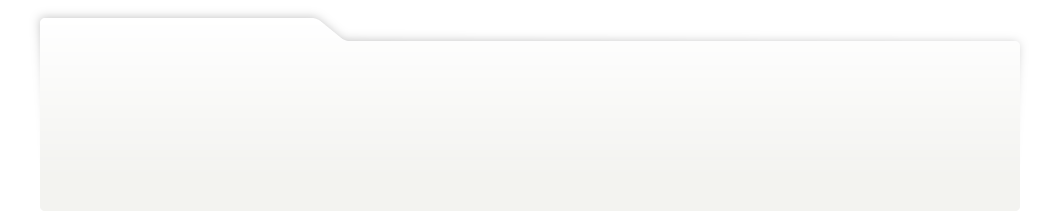
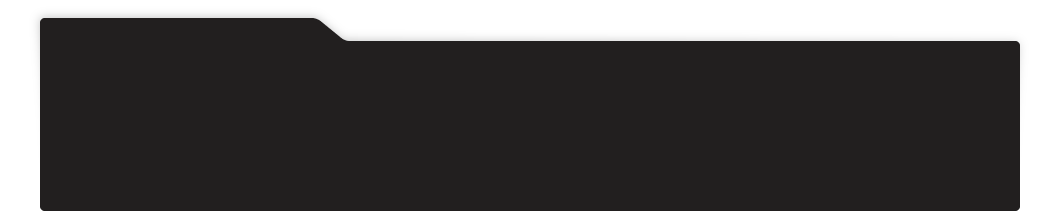
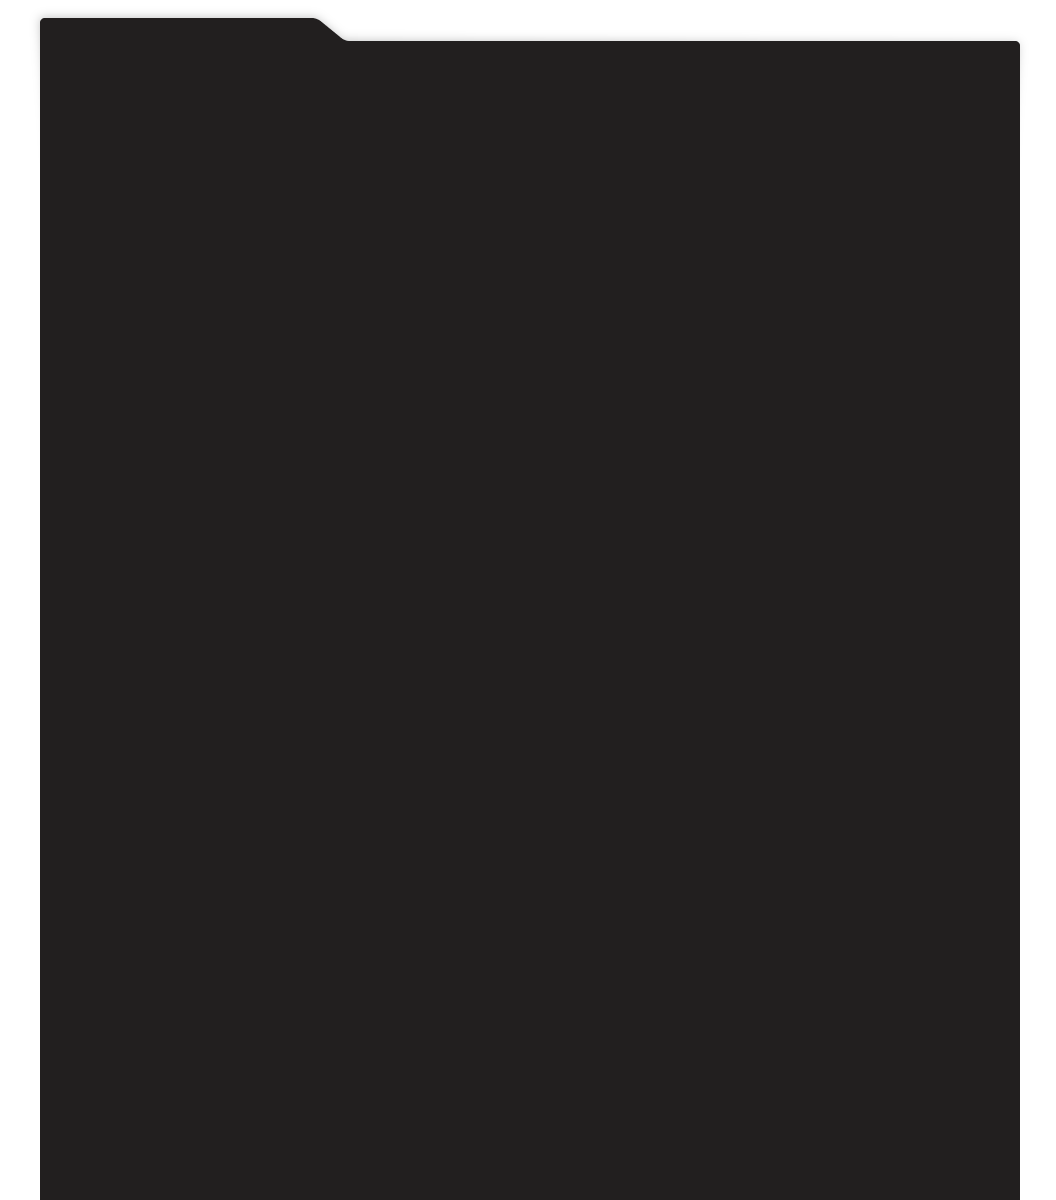
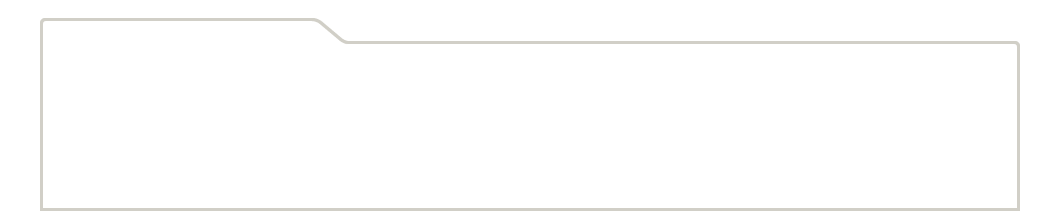
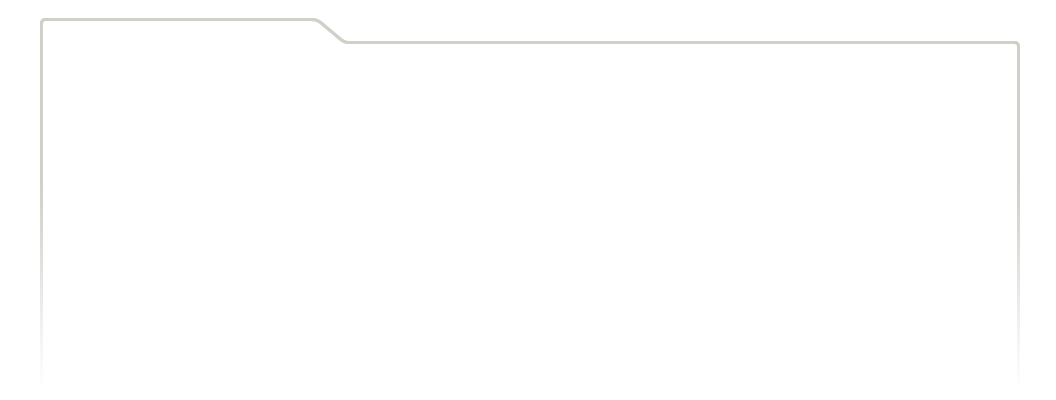
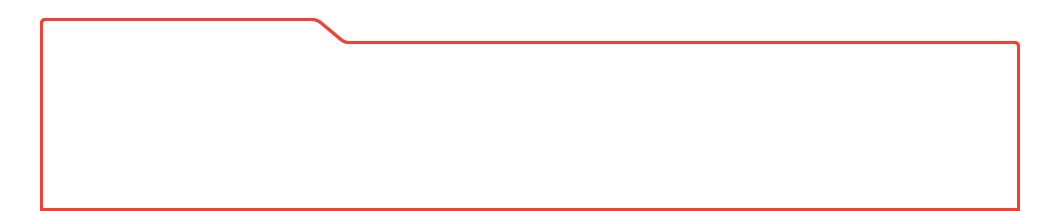
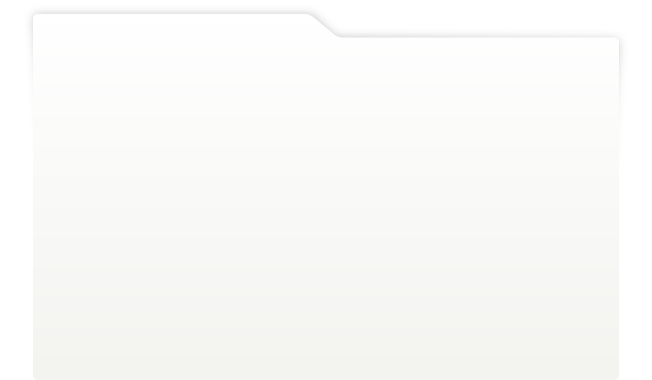
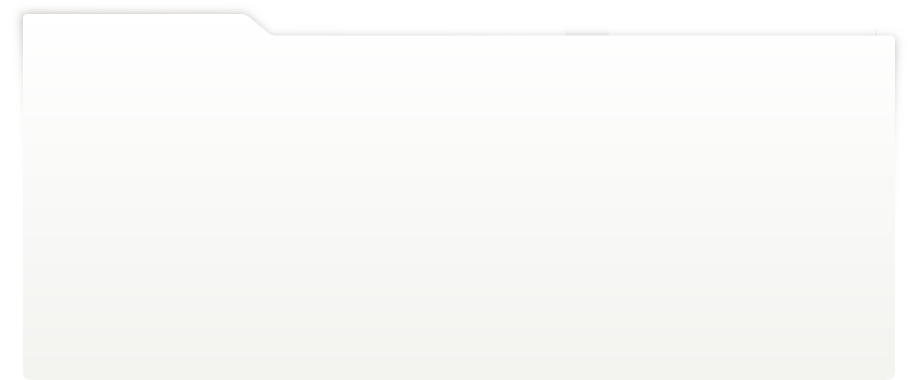
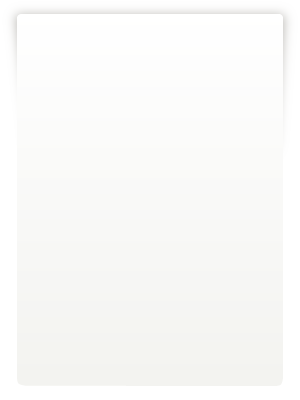
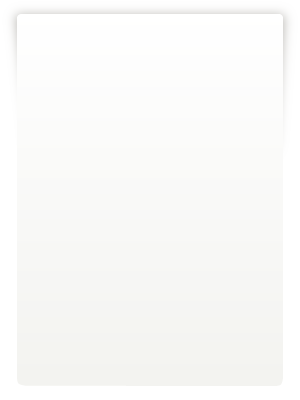
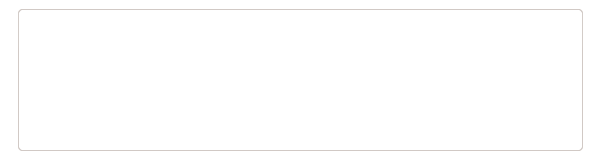
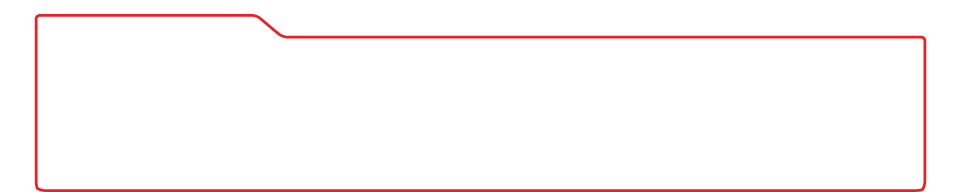
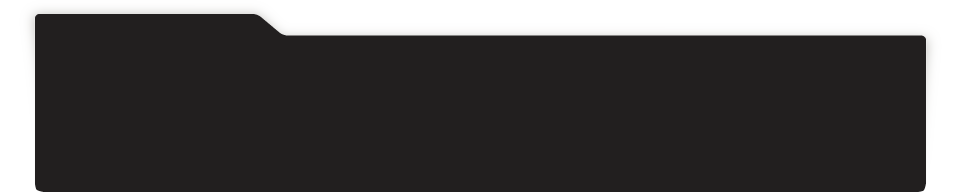
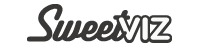
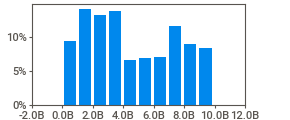
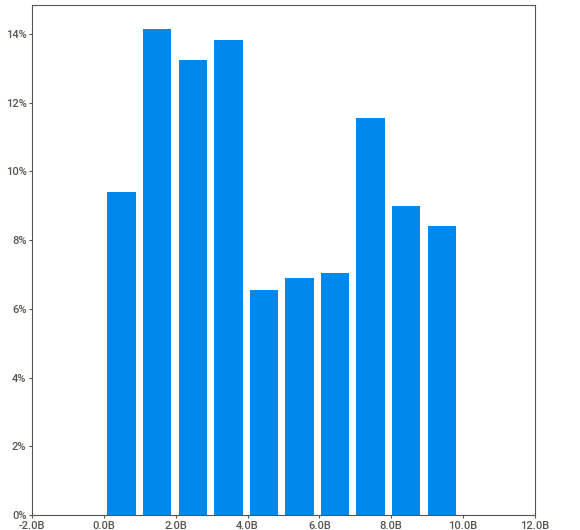
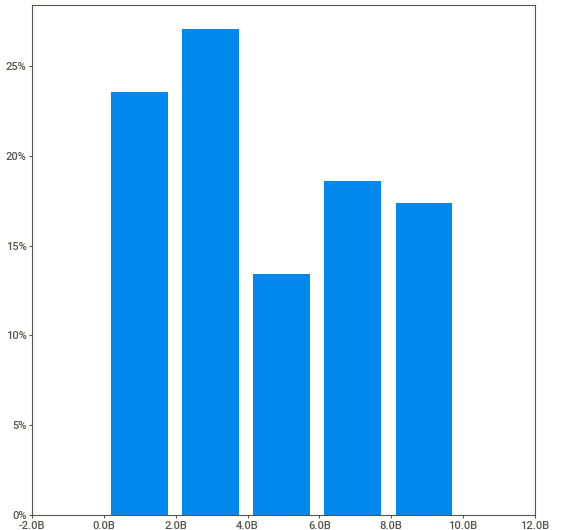
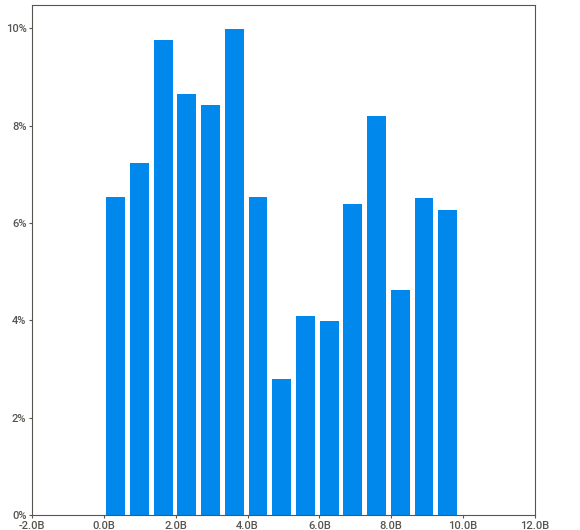
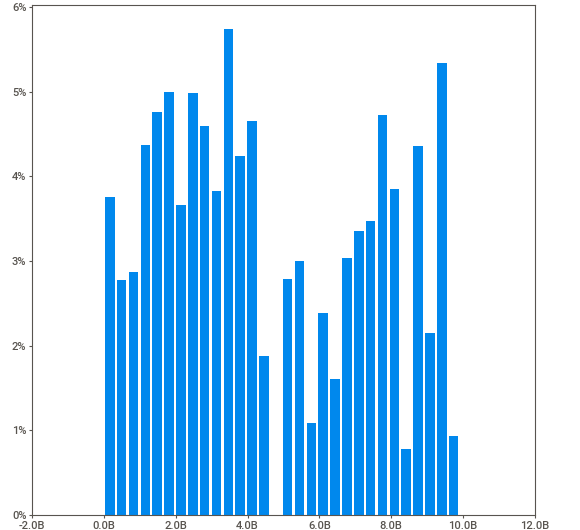
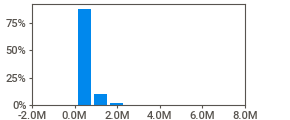
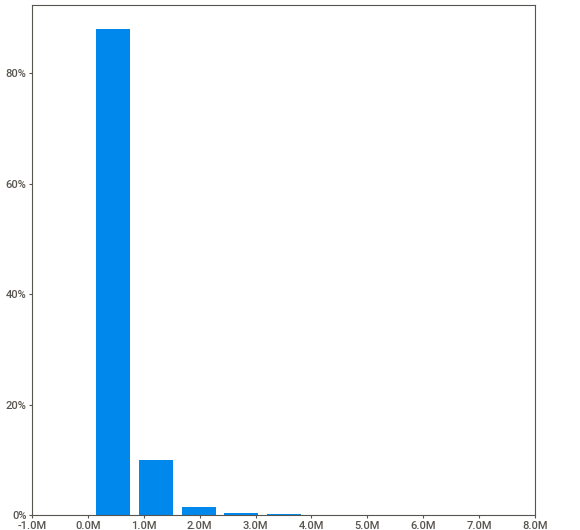
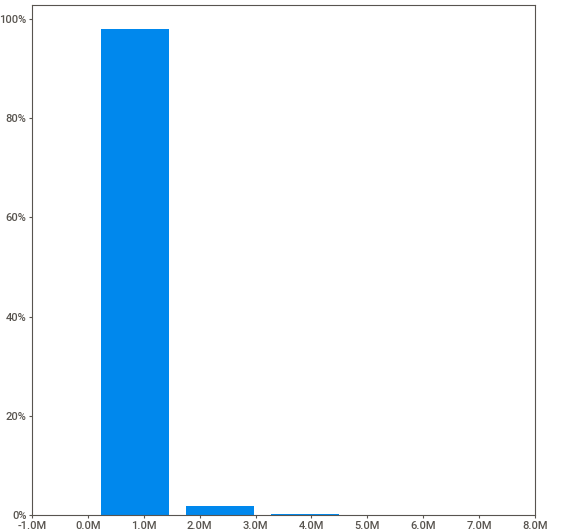
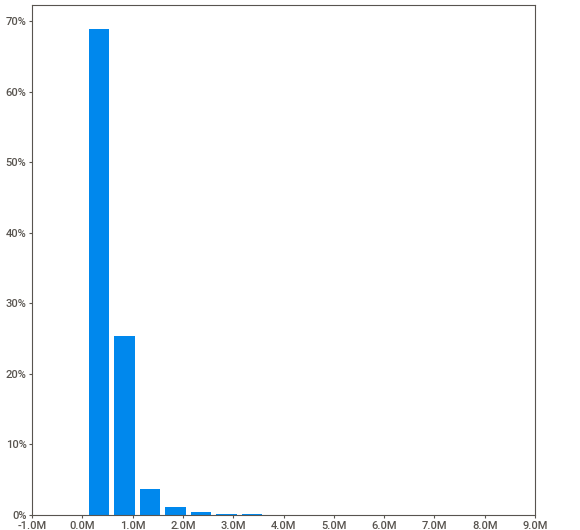
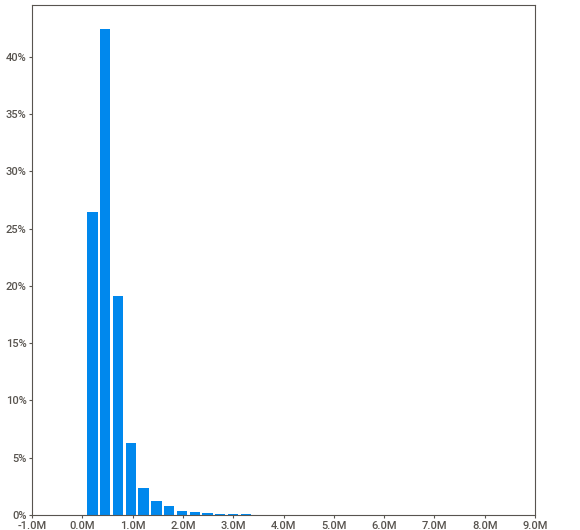
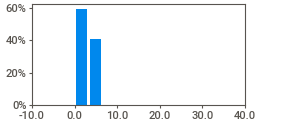
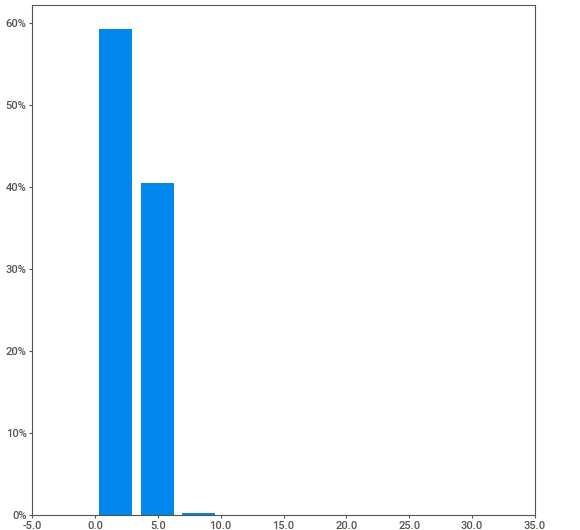
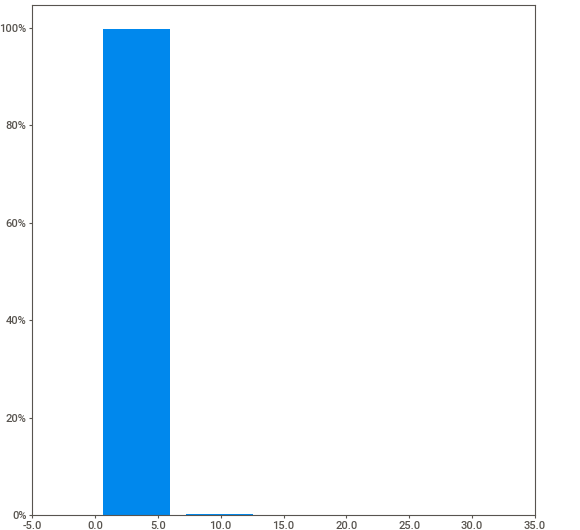
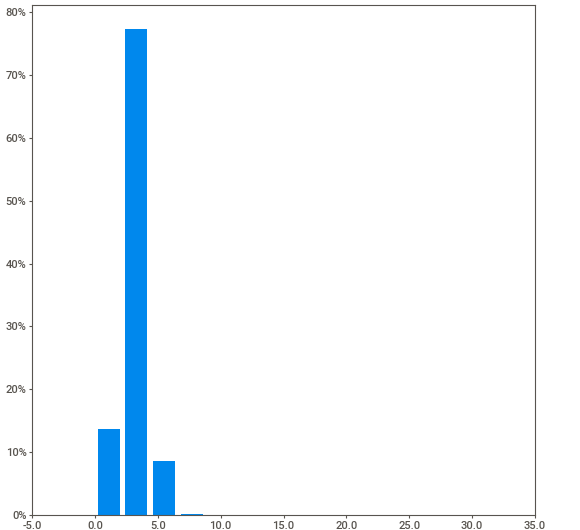
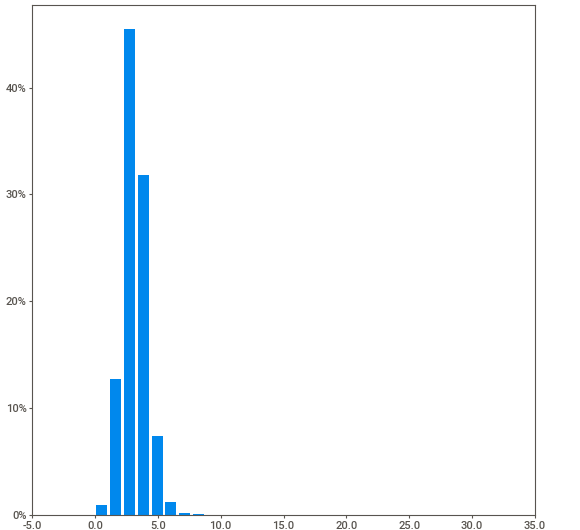
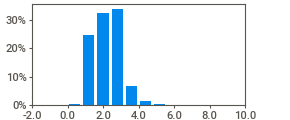
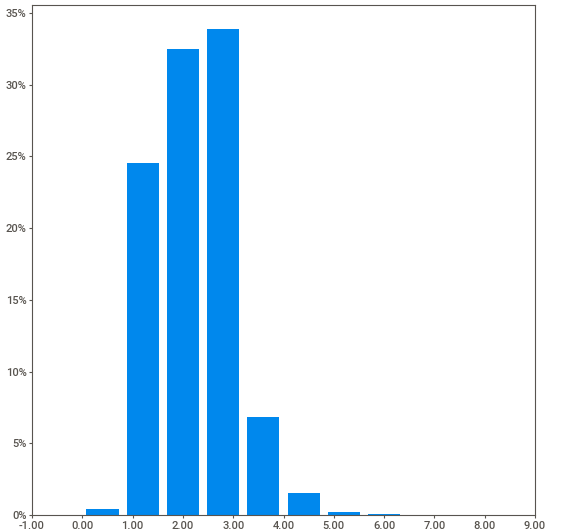
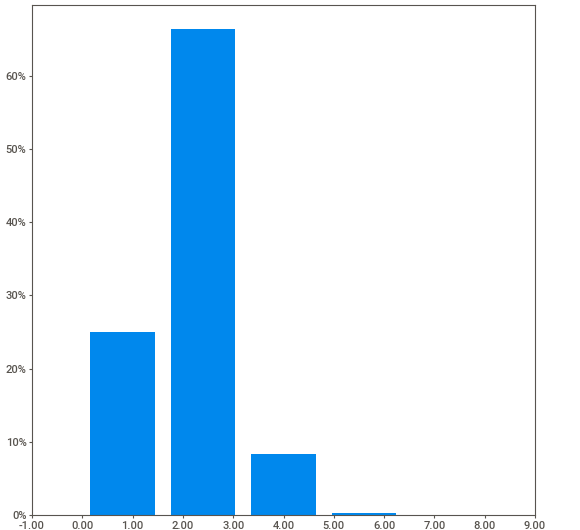
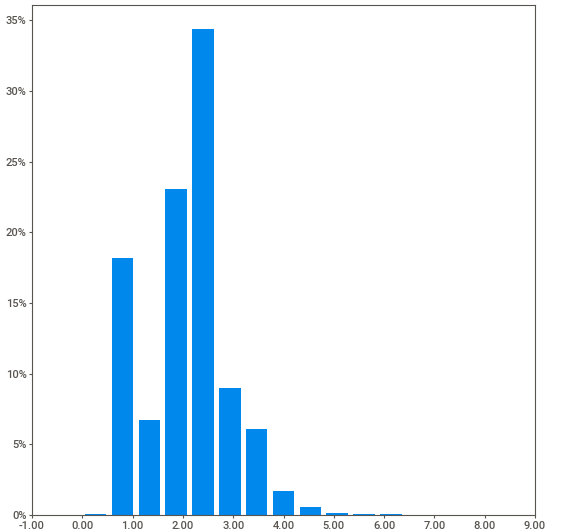
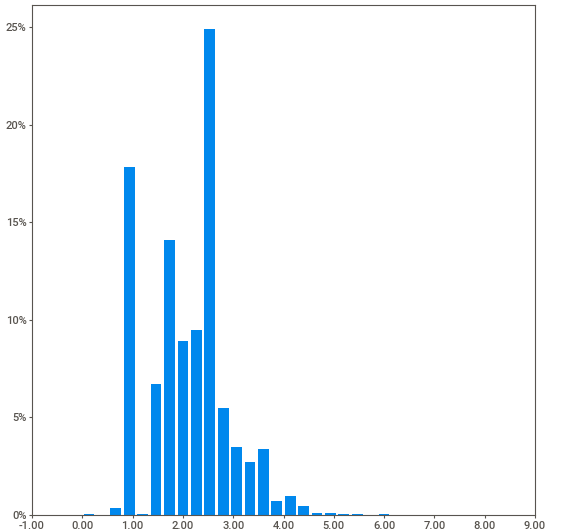
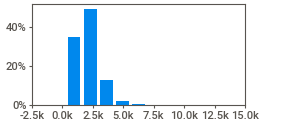
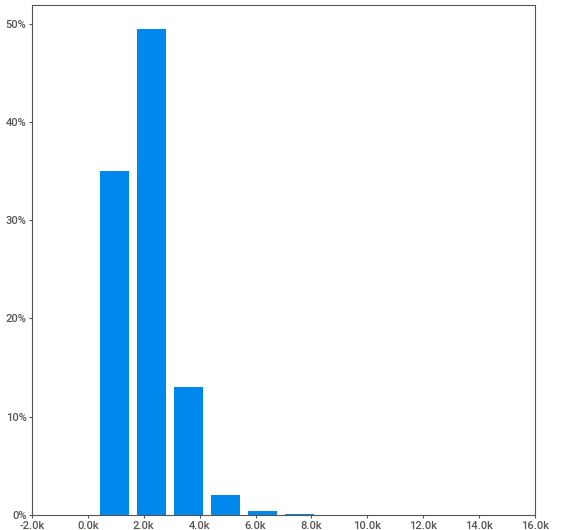
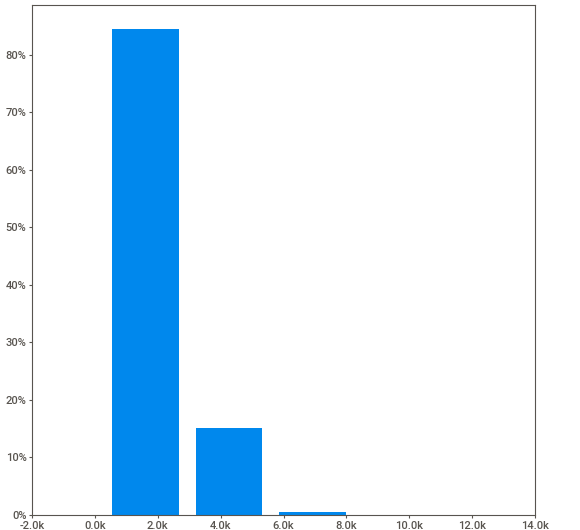
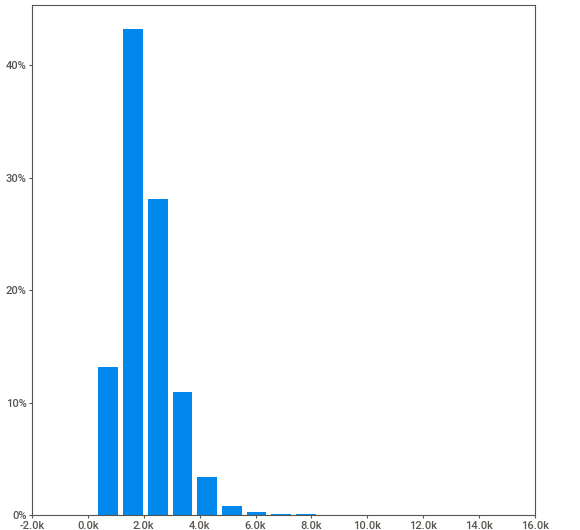
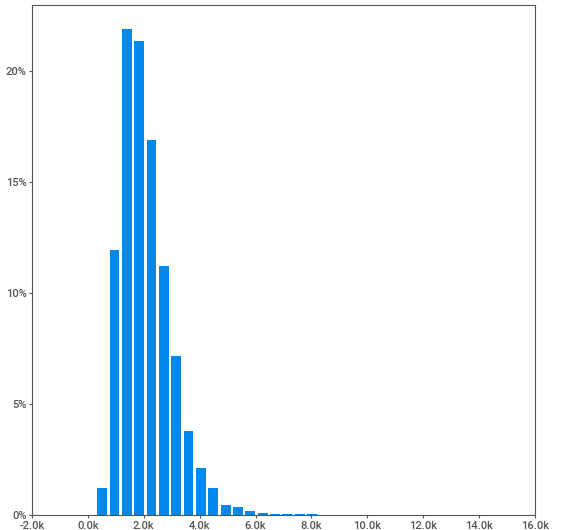
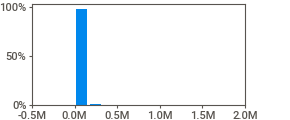
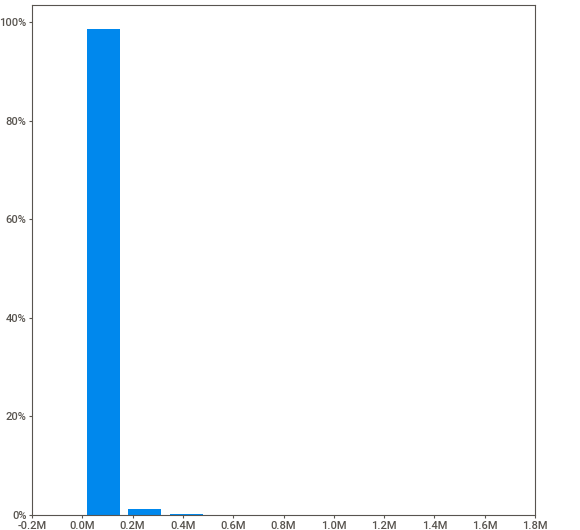
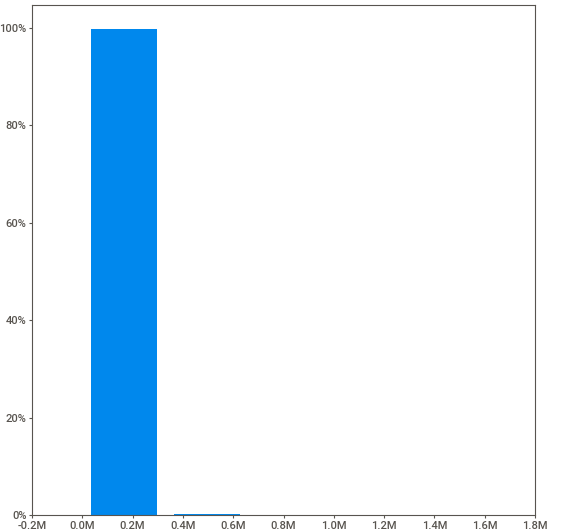
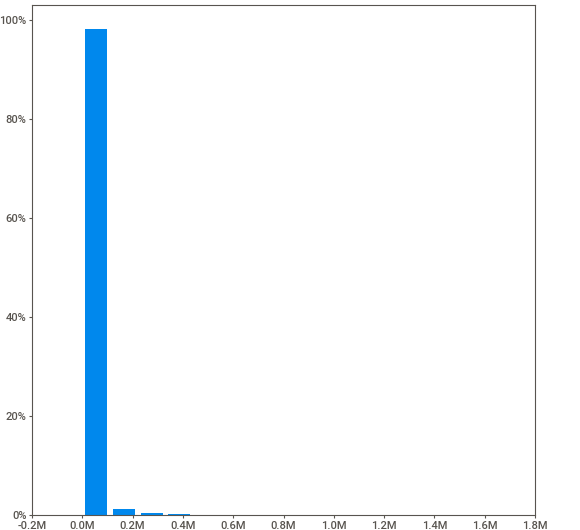
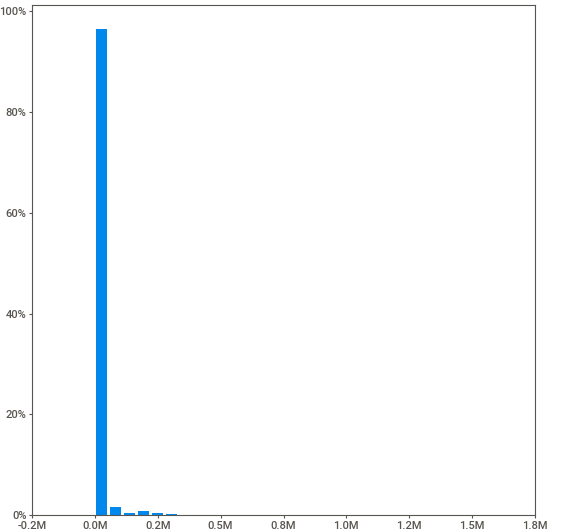
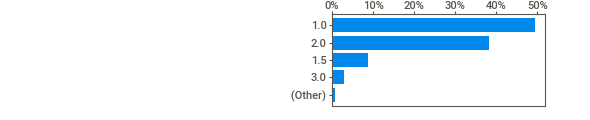
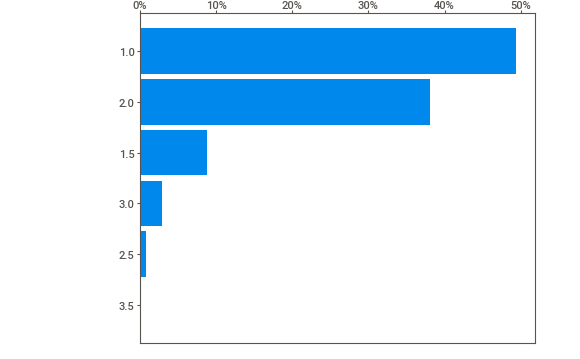
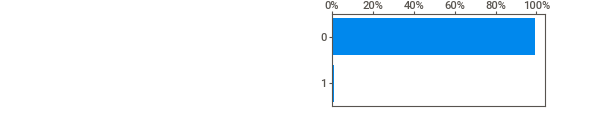
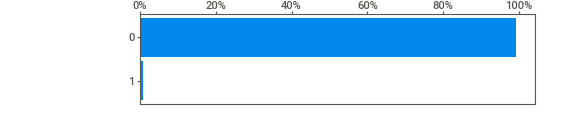
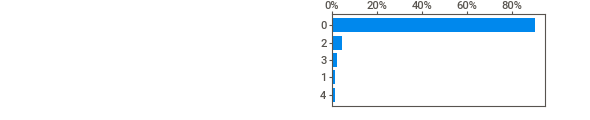
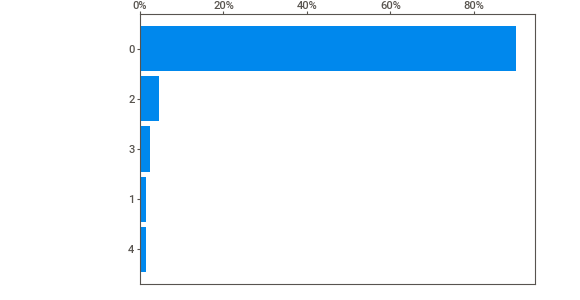
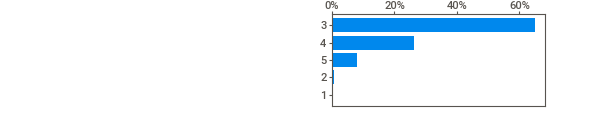
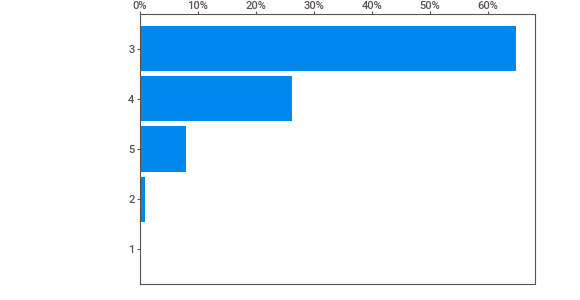
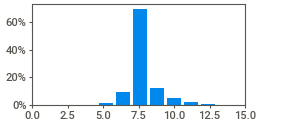
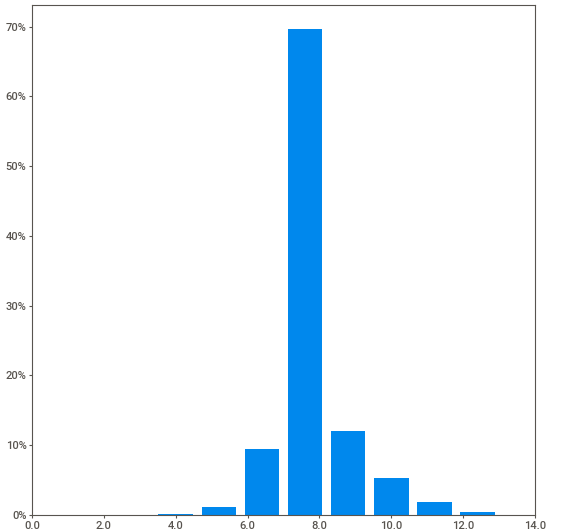
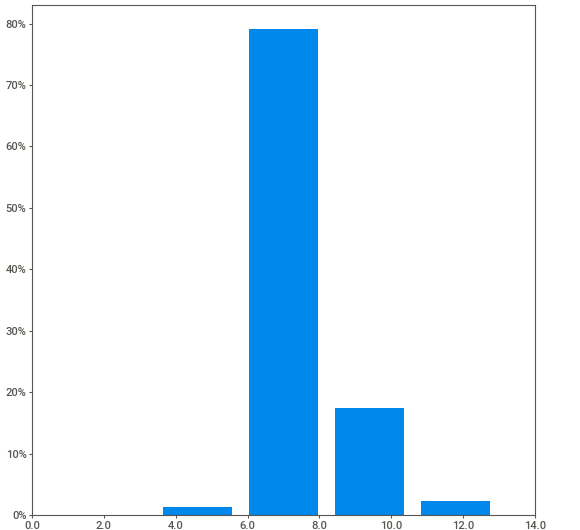
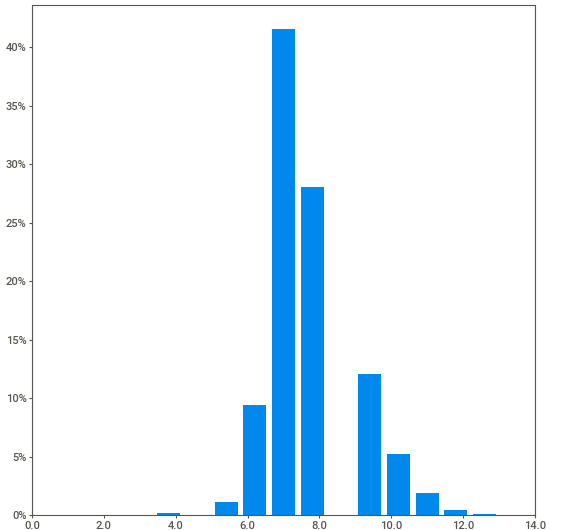
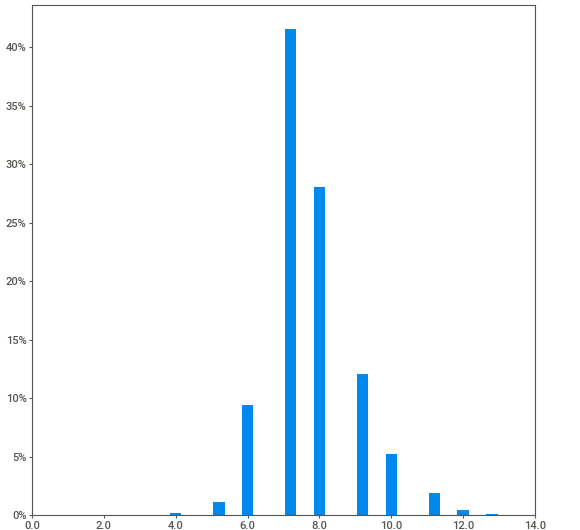
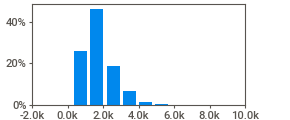
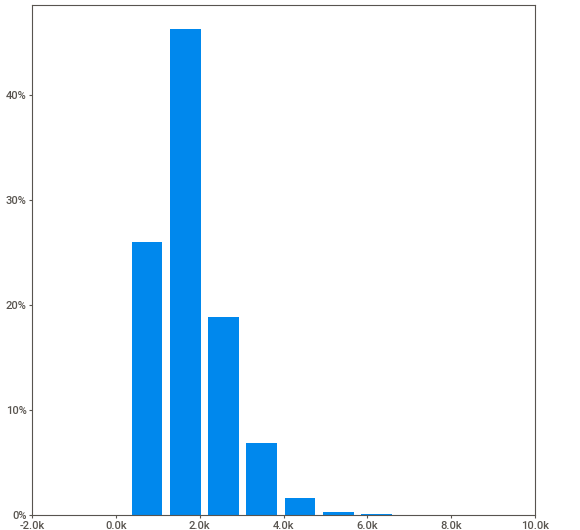
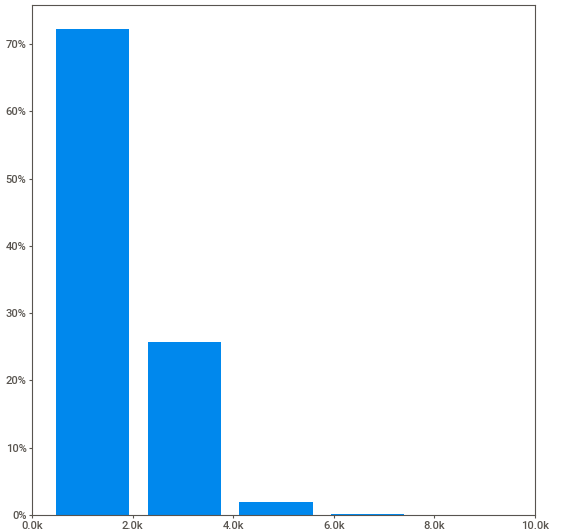
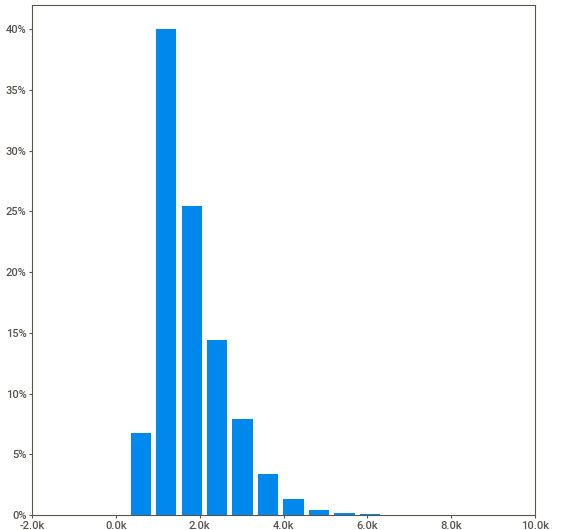
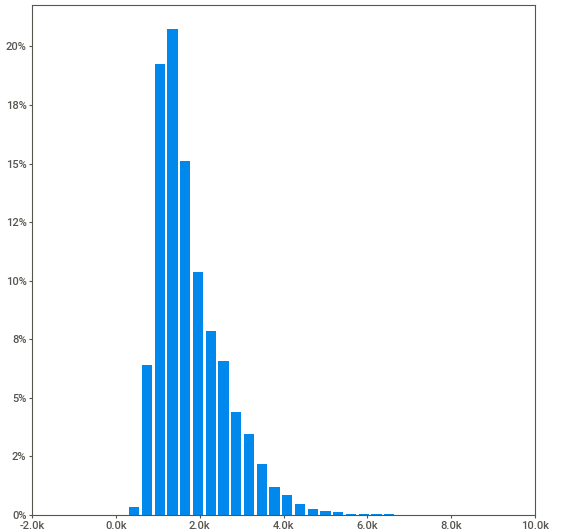
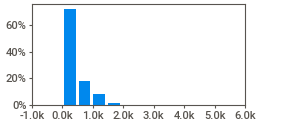
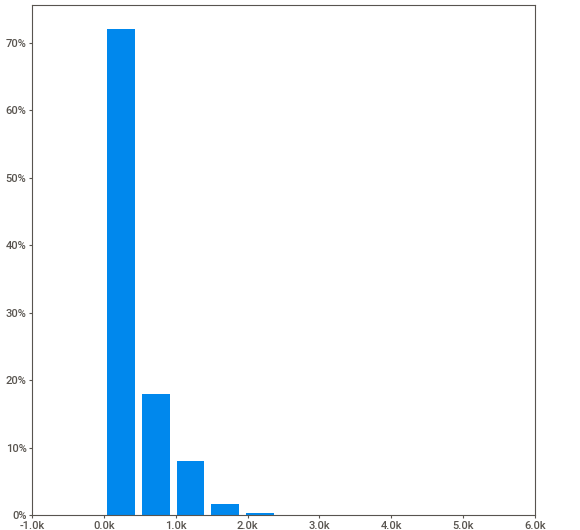
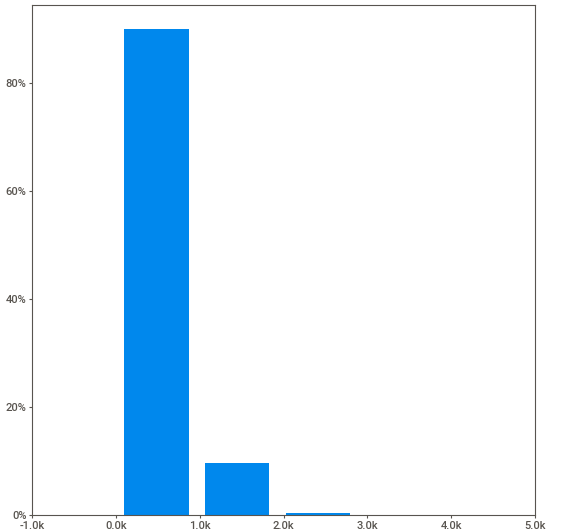
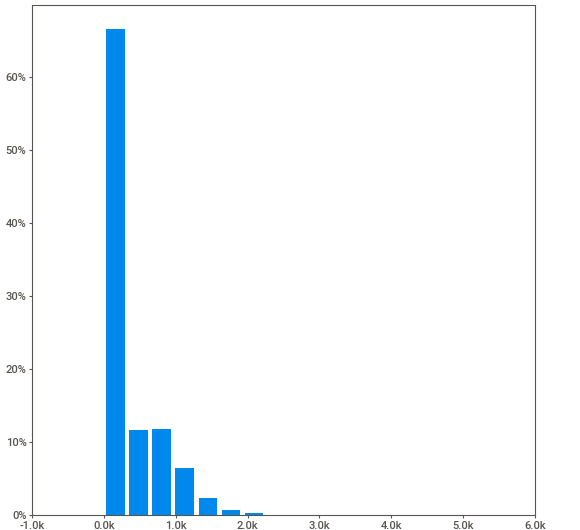
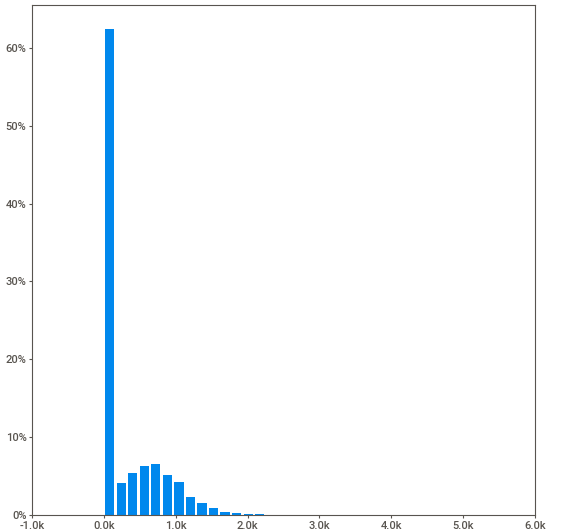
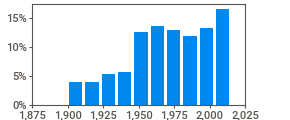
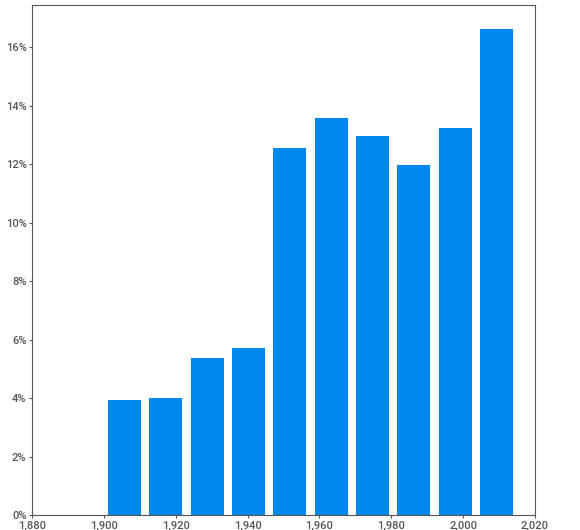
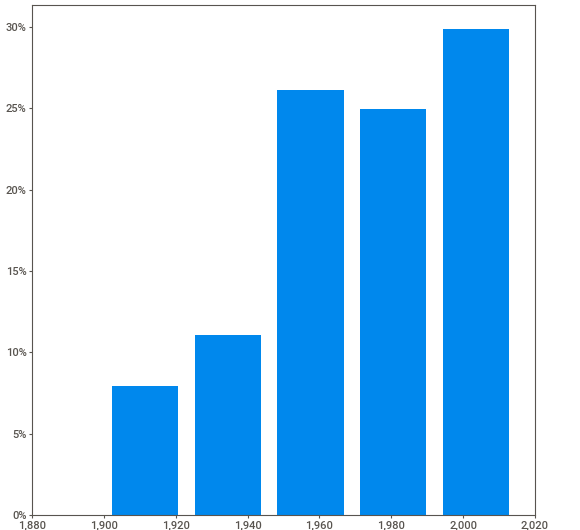
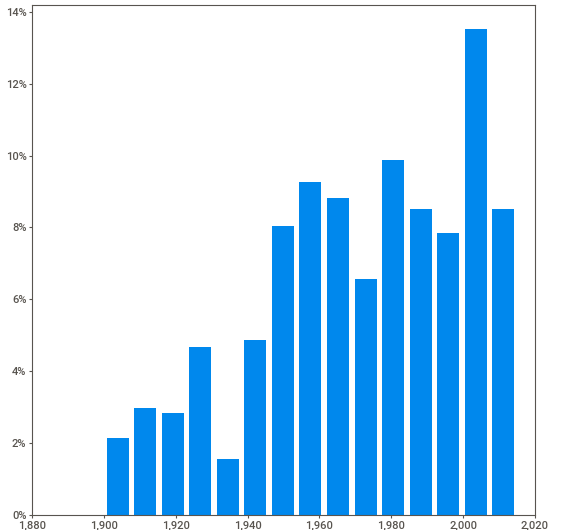
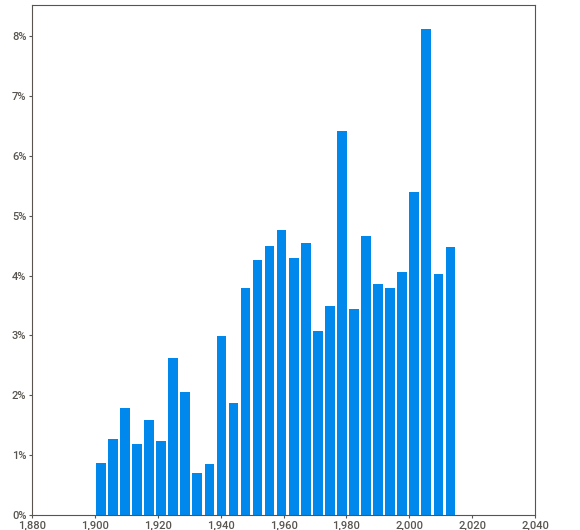
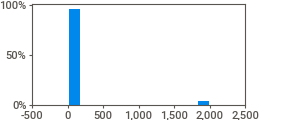
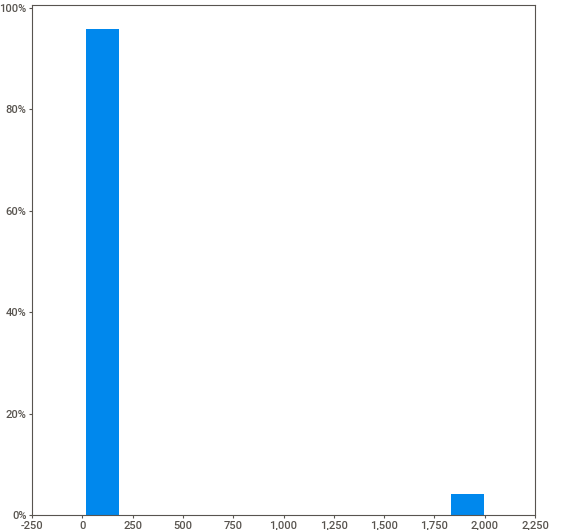
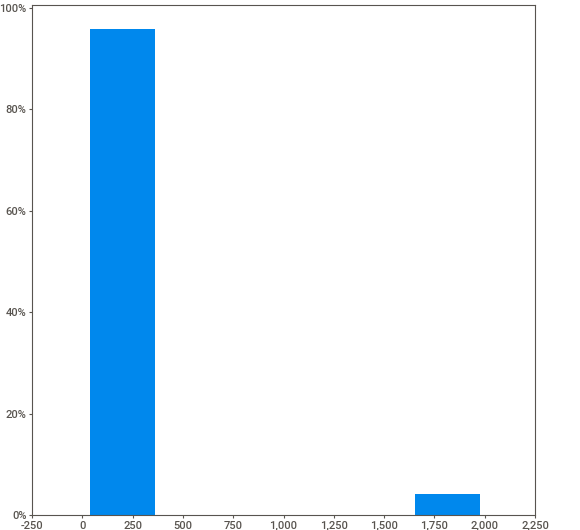
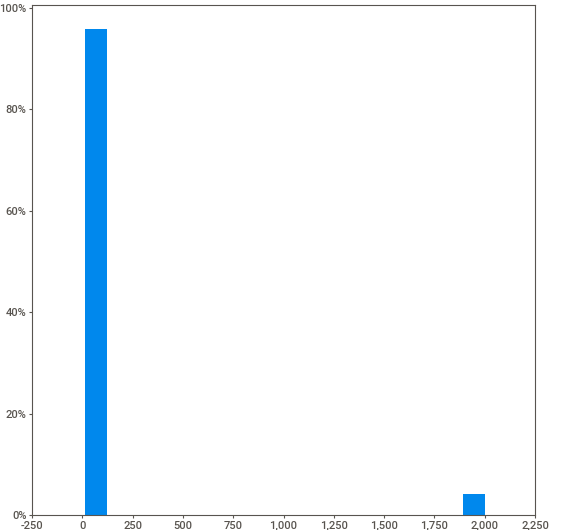
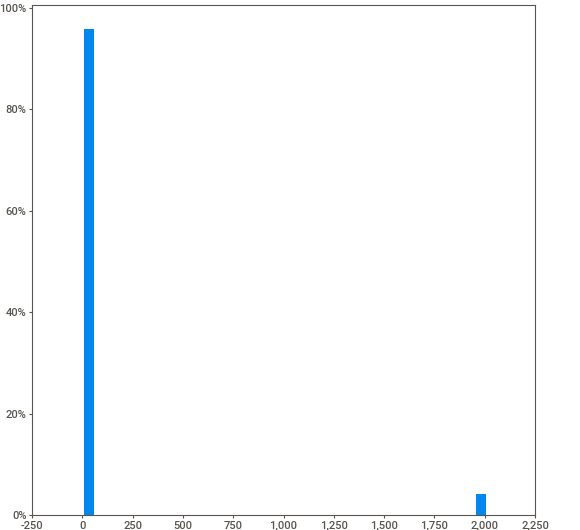
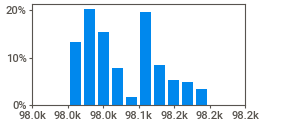
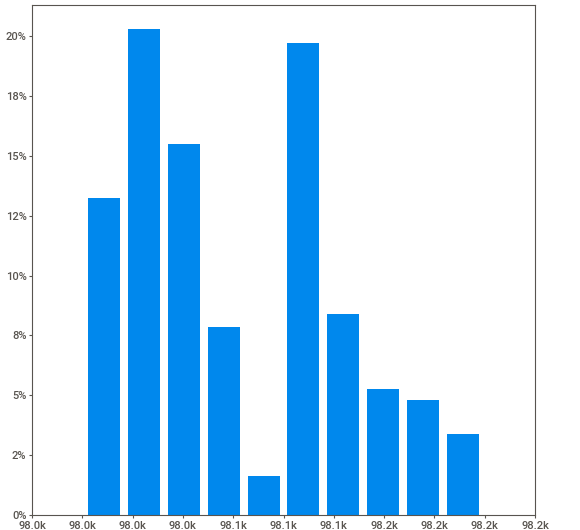
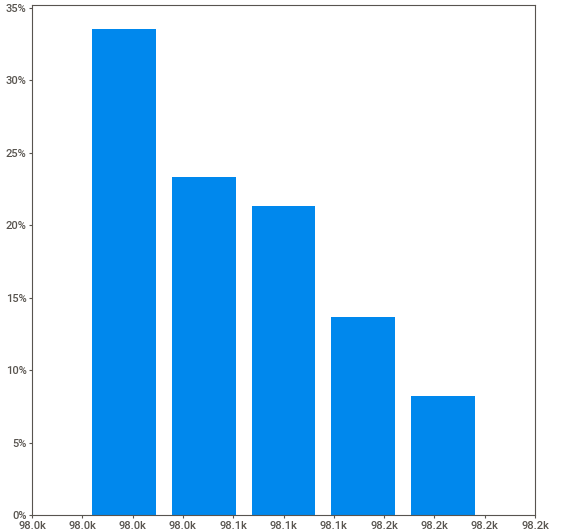
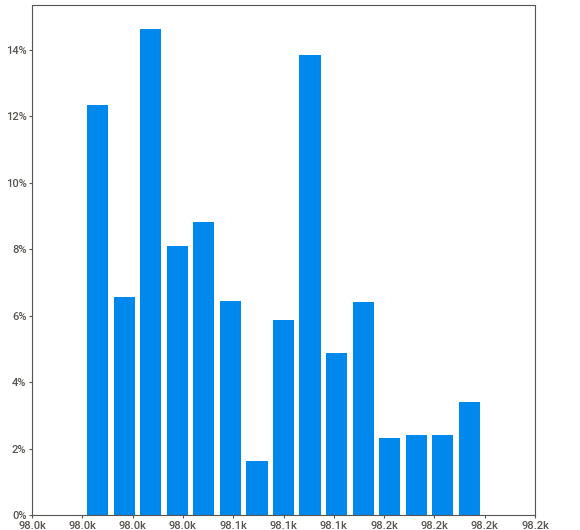
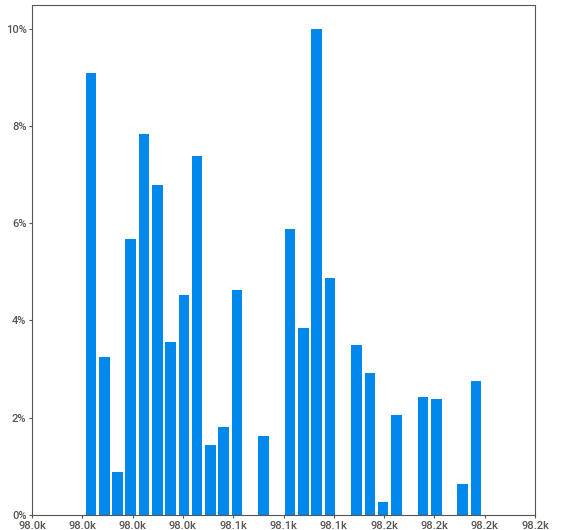
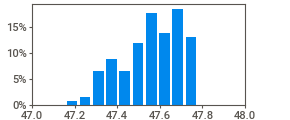
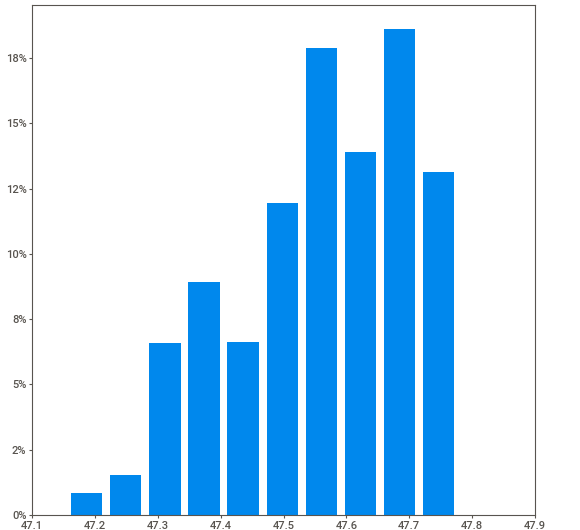
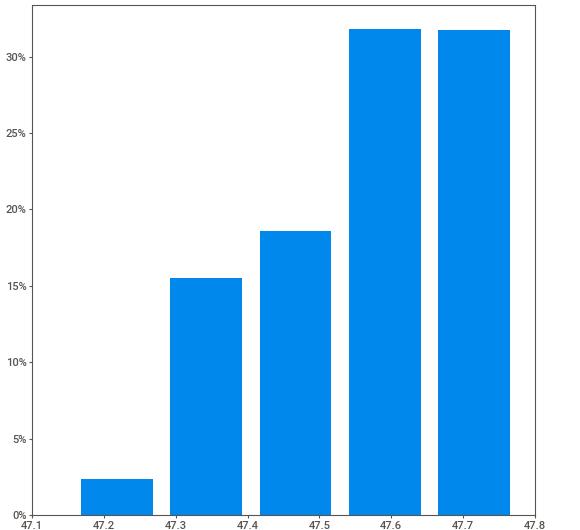
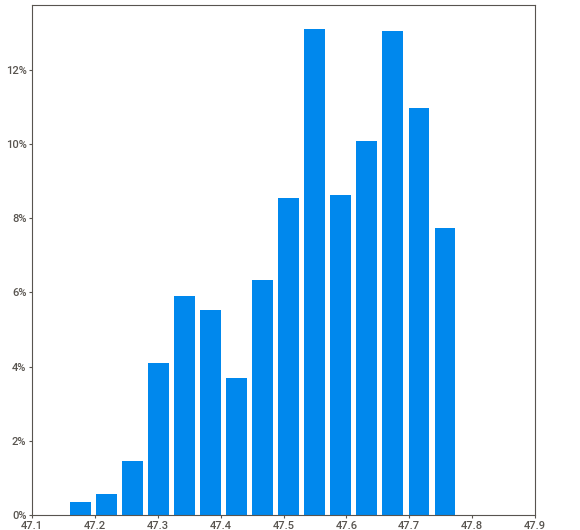
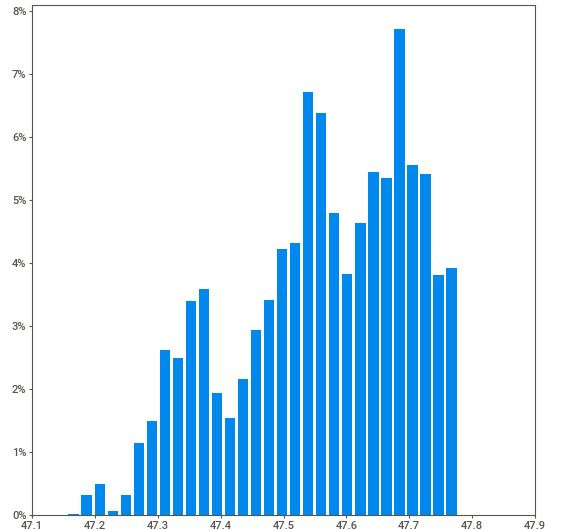
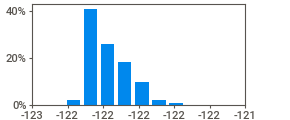
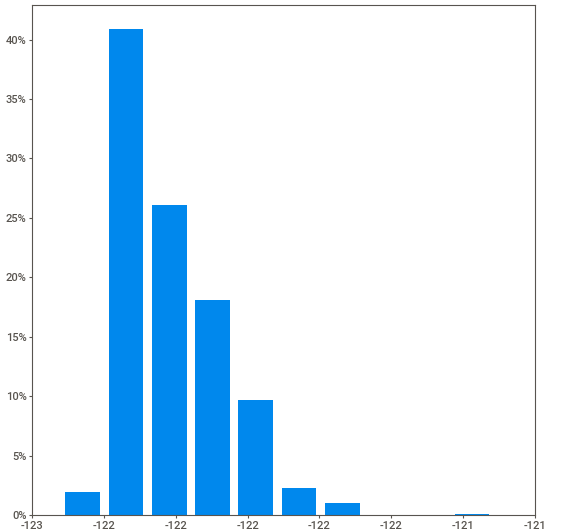
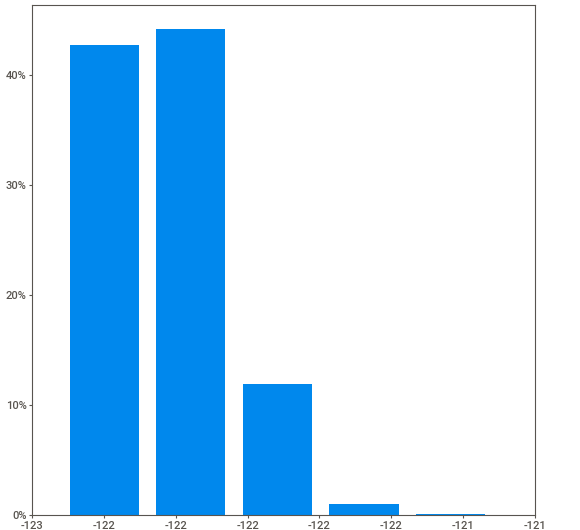
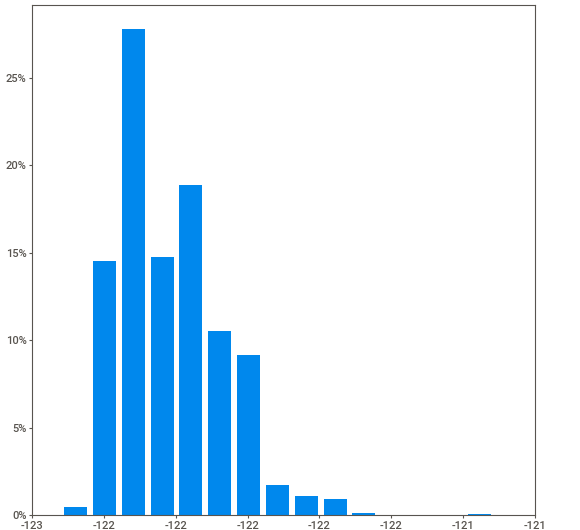
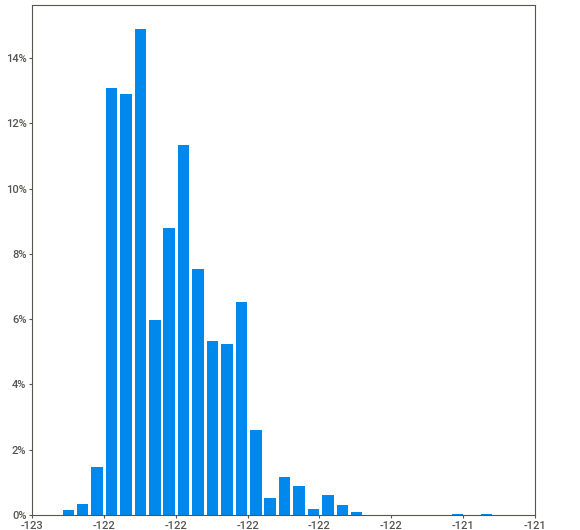
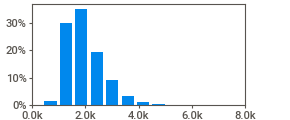
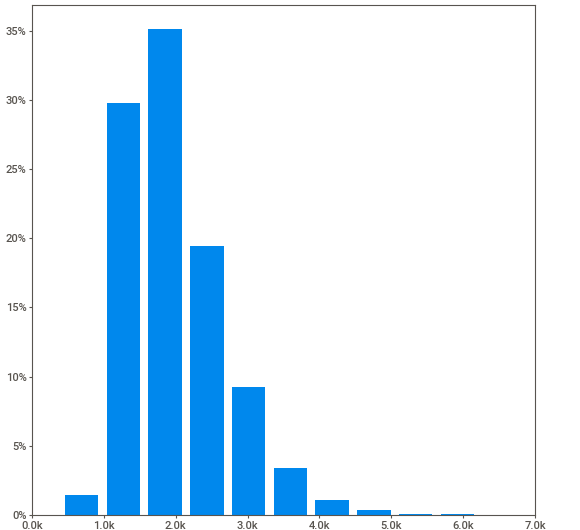
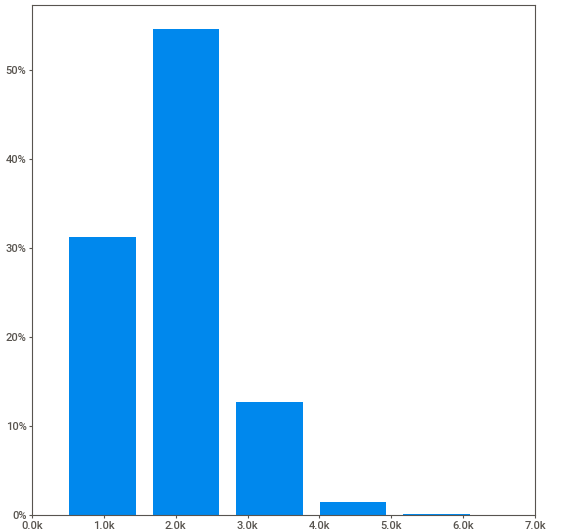
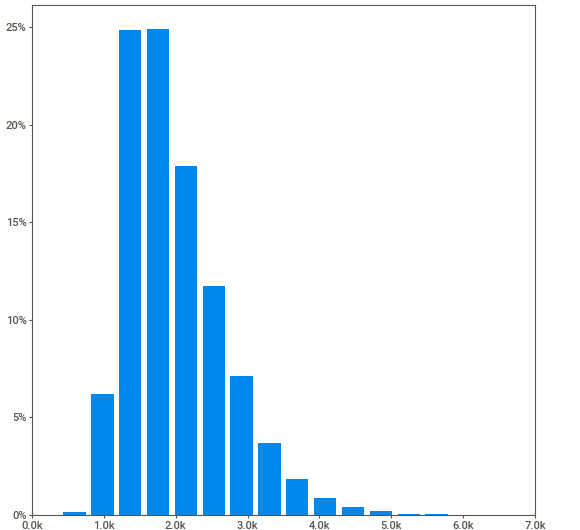
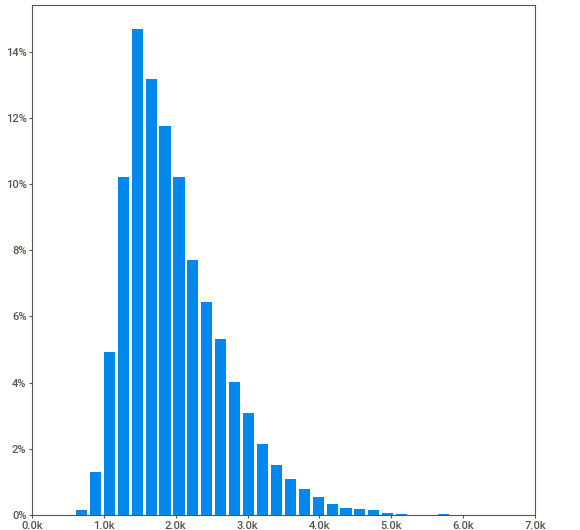
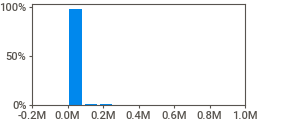
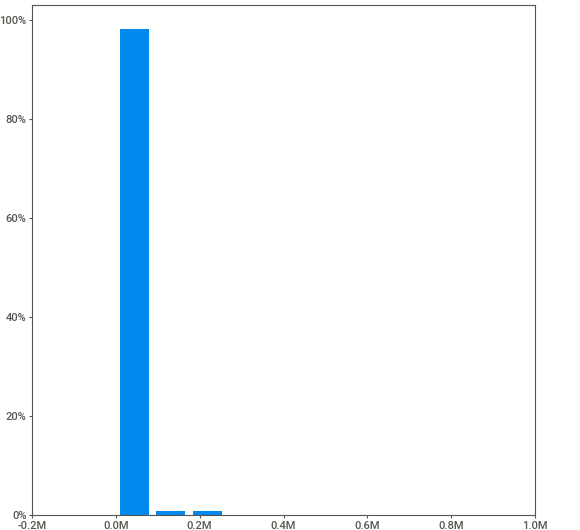
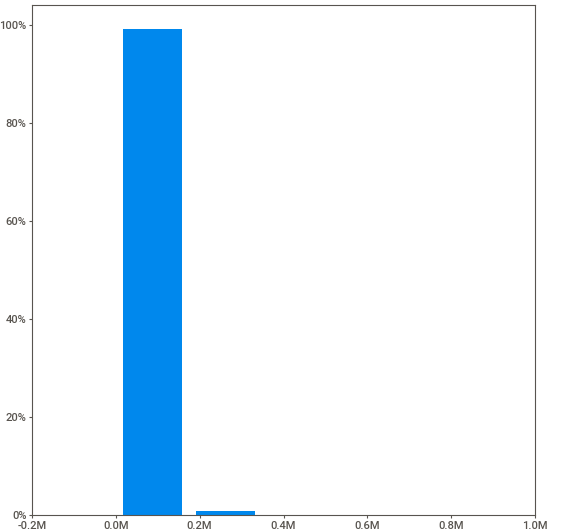
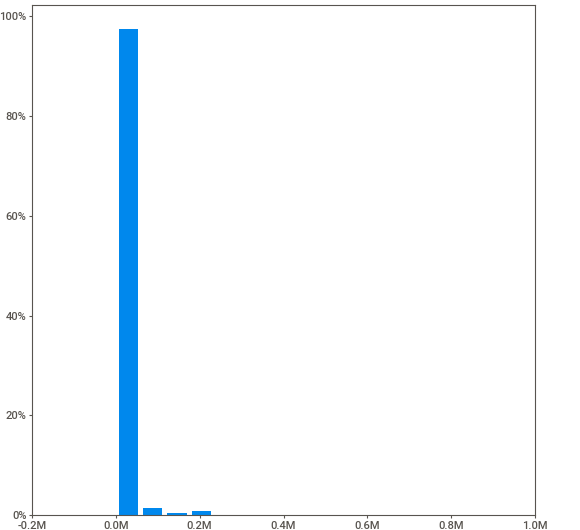
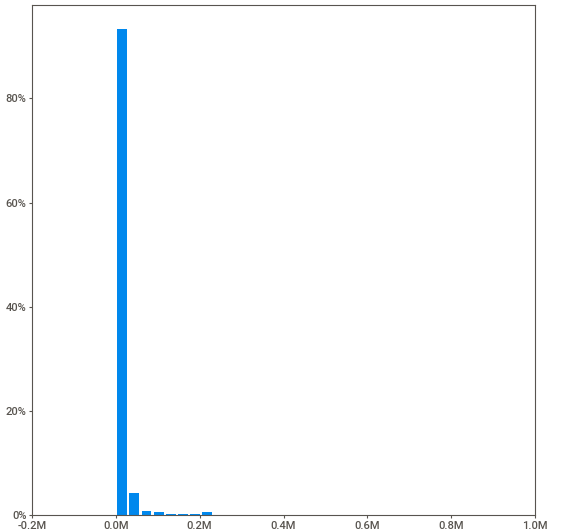
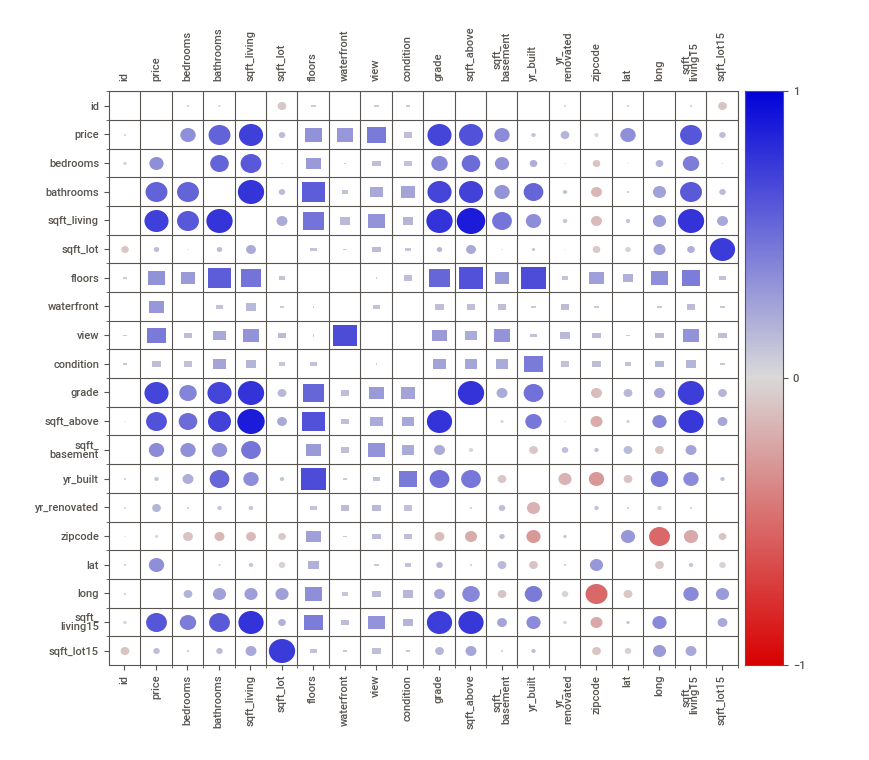
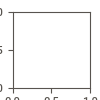

In [6]:
report = sv.analyze(df)
report.show_notebook()

### 2.2 Columns description

| Variable    | Description                                                                                                                                                                                                                                                          |   |   |   |
|-------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---|---|---|
| id          | Identification                                                                                                                                                                                                                                                       |   |   |   |
| date        | Date sold                                                                                                                                                                                                                                                            |   |   |   |
| price       | Sale price                                                                                                                                                                                                                                                           |   |   |   |
| bedrooms    | Number of bedrooms                                                                                                                                                                                                                                                   |   |   |   |
| bathrooms   | Number of bathrooms                                                                                                                                                                                                                                                  |   |   |   |
| sqft_liv    | Size of living area in square feet                                                                                                                                                                                                                                   |   |   |   |
| sqft_lot    | Size of the lot in square feet                                                                                                                                                                                                                                       |   |   |   |
| floors      | Number of floors                                                                                                                                                                                                                                                     |   |   |   |
| waterfront  | ‘1’ if the property has a waterfront, ‘0’ if not.                                                                                                                                                                                                                    |   |   |   |
| view        | An index from 0 to 4 of how good the view of the property was                                                                                                                                                                                                        |   |   |   |
| condition   | Condition of the house, ranked from 1 to 5                                                                                                                                                                                                                           |   |   |   |
| grade       | Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value. Additional information in: KingCounty |   |   |   |
| sqft_above  | Square feet above ground                                                                                                                                                                                                                                             |   |   |   |
| sqft_basmt  | Square feet below ground                                                                                                                                                                                                                                             |   |   |   |
| yr_built    | Year built                                                                                                                                                                                                                                                           |   |   |   |
| yr_renov    | Year renovated. ‘0’ if never renovated                                                                                                                                                                                                                               |   |   |   |
| zipcode     | 5 digit zip code                                                                                                                                                                                                                                                     |   |   |   |
| lat         | Latitude                                                                                                                                                                                                                                                             |   |   |   |
| long        | Longitude                                                                                                                                                                                                                                                            |   |   |   |
| squft_liv15 | Average size of interior housing living space for the closest 15 houses, in square feet                                                                                                                                                                              |   |   |   |
| squft_lot15 | Average size of land lots for the closest 15 houses, in square feet                                                                                                                                                                                                  |   |   |   |
| Shape_leng  | Polygon length in meters                                                                                                                                                                                                                                             |   |   |   |
| Shape_Area  | Polygon area in meters                                                                                                                                                                                                                                               |   |   |   |

### 2.3 Nulls

In [7]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### 2.4 Outliers

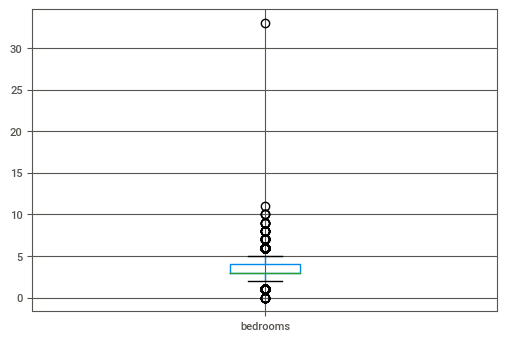

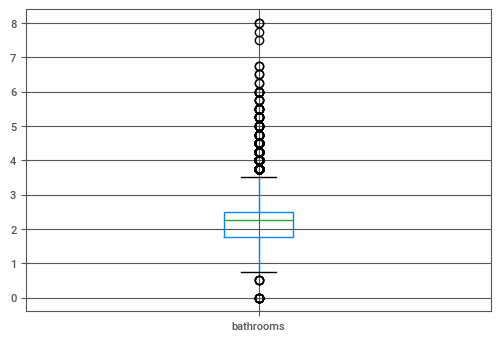

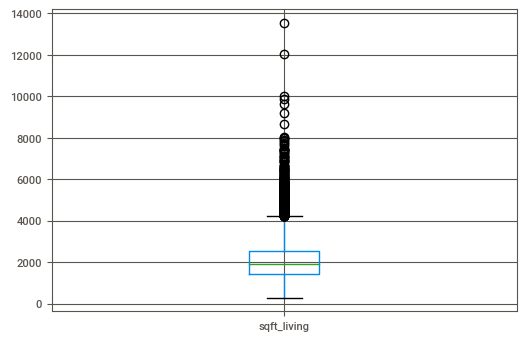

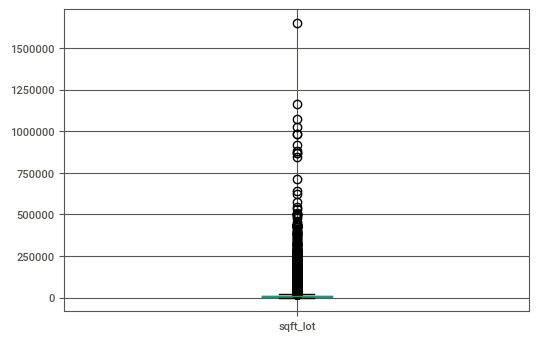

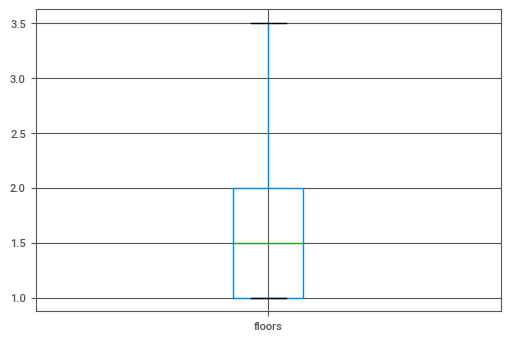

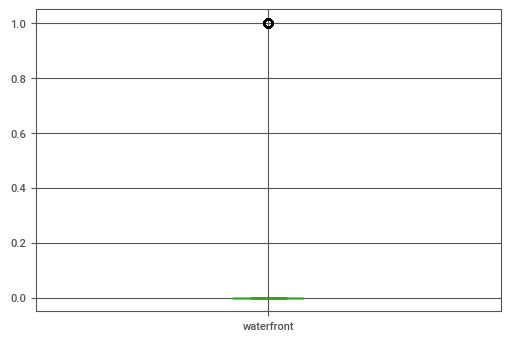

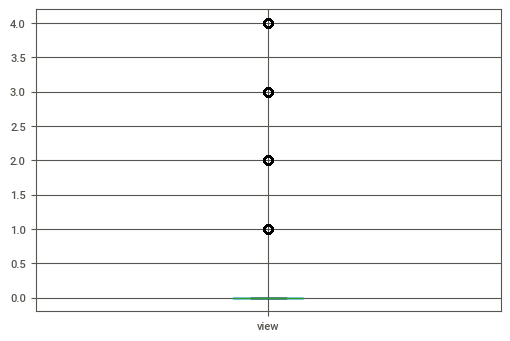

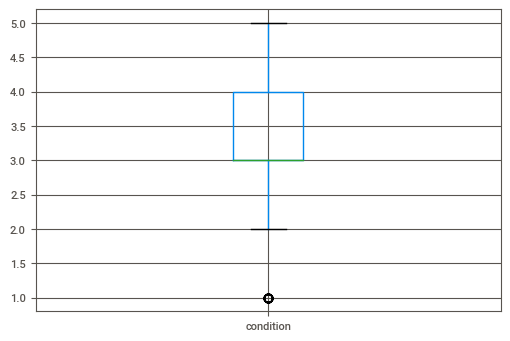

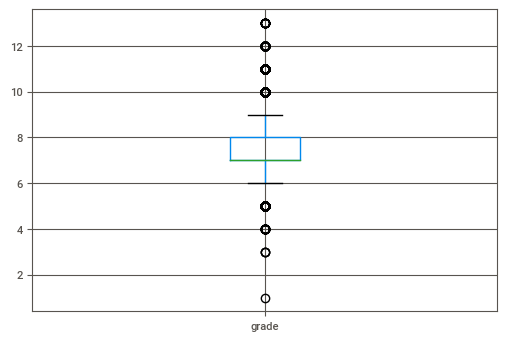

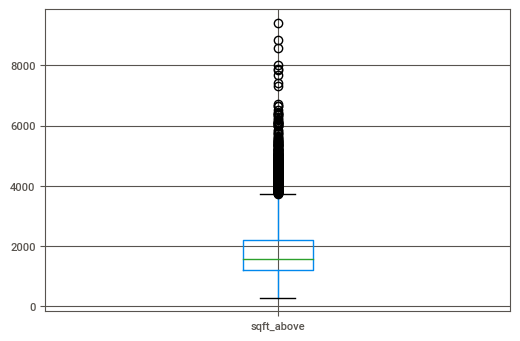

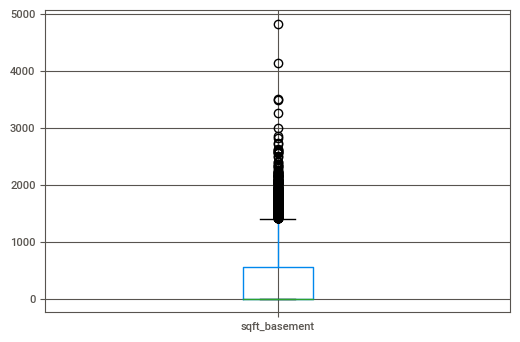

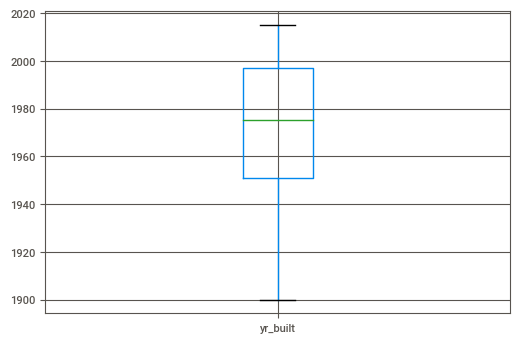

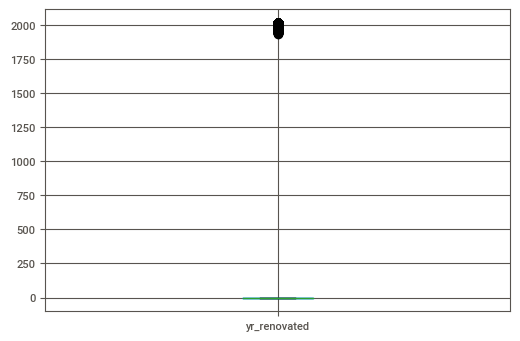

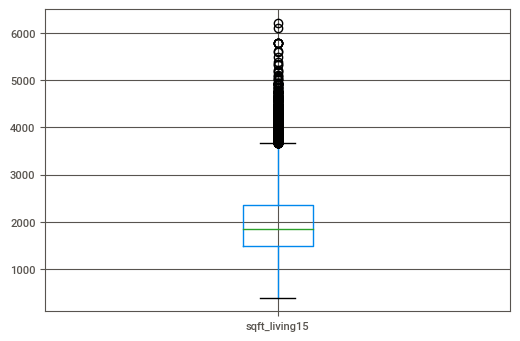

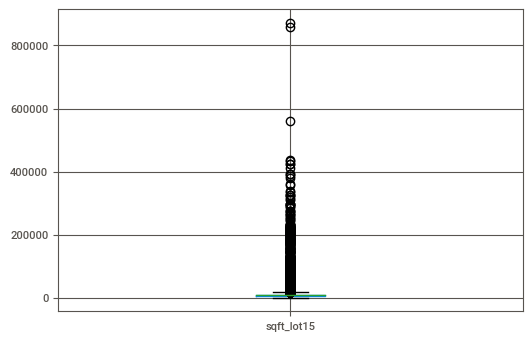

In [8]:
unwanted_boxplot_cols = ['id', 'date', 'price', 'zipcode', 'lat', 'long']

for column in df:
    if column not in unwanted_boxplot_cols:
        try:
            plt.figure()
            df.boxplot([column])
        except:
            continue

Os outliers além de bedroom, sqft_lot e sqtf_lot15 foram justificados pela equipe como 'apartamentos extraordinários' e não exatamente erros de imputação. Assim, seus outliers não precisarão sofrer ajuste, uma vez que estes possam ser apartamentos escolhidos em um dos critérios propostos.

Os conceitos de meio quarto e meio banheiro, assim como meio andar foram investigados e considerados plausíveis, logo, também não sofrerão tratativa.

## 3. Data preparation

OBS.: O tratamento de nulos não foi necessário pela inexistência de nulos

### 3.1 Outlier treatment

A partir da visualização dos boxplots na seção 'Data Understanding'

#### 3.1.1 Número de quartos ilógico

In [9]:
df.loc[df['bedrooms'] == 33]

id       date     price  bedrooms  bathrooms  sqft_living  \
15870  2402100895 2014-06-25  640000.0        33       1.75         1620   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
15870      6000     1.0           0     0          5      7        1040   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
15870            580      1947             0    98103  47.6878 -122.331   

       sqft_living15  sqft_lot15  
15870           1330        4700

Por conhecimento geral e noções de espaço dos integrantes do grupo, não é possível ter 33 quartos em um imóvel de 1620ft² de área habitável, pois se cada quarto tiver 16m² (tamanho médio de um quarto ideal de acordo com https://www.2quartos.com/qual-tamanho-ideal-comodos-casa/) ou 172.224ft², apenas os quartos ocupariam 5683ft². Assim, como não é possível escolher um imóvel sem a informação do número de quartos certa, de acordo com a equipe, este imóvel será removido da lista 

In [10]:
idx = df.loc[df['bedrooms'] == 33].index[0]
df.drop([idx], inplace=True)

#### 3.1.2 Área não habitável do terreno muito maior que a dos vizinhos próximos

In [11]:
df.loc[df['sqft_lot'] > 1500000]

id       date     price  bedrooms  bathrooms  sqft_living  \
1719  1020069017 2015-03-27  700000.0         4        1.0         1300   

      sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
1719   1651359     1.0           0     3          4      6        1300   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
1719              0      1920             0    98022  47.2313 -122.023   

      sqft_living15  sqft_lot15  
1719           2560      425581

Também foi considerado pelo grupo um outlier ilógico conforme área habitável e área de lotes próximos, ainda mais após análise de preços. Assim, a área deste lote é substituida por esse valor médio da área

In [12]:
idx = df.loc[df['sqft_lot'] > 1500000].index[0]
df['sqft_lot'][idx]=df['sqft_lot15'][idx].copy()

C:\Users\Leticia Campos\AppData\Local\Temp\ipykernel_5080\1687699294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sqft_lot'][idx]=df['sqft_lot15'][idx].copy()


#### 3.1.3 Área do lote maior ou igual à área dos 15 vizinhos próximos (incoerência), além de muito alto valor

In [13]:
df.loc[df['sqft_lot15'] > 600000]

id       date      price  bedrooms  bathrooms  sqft_living  \
9714    225079036 2015-01-07   937500.0         4        4.0         5545   
20452  1125079111 2015-04-15  1600000.0         4        5.5         6530   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
9714     871200     2.0           0     0          3     11        3605   
20452    871200     2.0           0     2          3     11        6530   

       sqft_basement  yr_built  yr_renovated  zipcode     lat     long  \
9714            1940      2003             0    98014  47.676 -121.882   
20452              0      2008             0    98014  47.664 -121.878   

       sqft_living15  sqft_lot15  
9714            3420      871200  
20452           1280      858132

Como o próprio título da seção diz, este apartamento demonstrou incoerência com a área de vizinhos próximos, além da alta magnitude de pés quadrados. Como as áreas geram incerteza sobre qual delas está certa, deicidiu-se que seriam eliminadas do estudo.

In [14]:
idx = df.loc[df['sqft_lot15'] > 600000].index[0]
df.drop([idx], inplace=True)

### 3.2 Tranforming zipcodes into cities

Decidiu-se criar uma nova feature, a partir de zipcode, que informasse o distrito o qual aquela casa pertence, uma vez haver mais informações por distrito nos datasets disponiveis pelo site do governo de King County


In [15]:
df2 = pd.read_csv('datasets/kingcountyzipcodes.csv')

In [16]:
df2.head()

X          Y  OBJECTID    ZIP  ZIPCODE  COUNTY ZIP_TYPE  \
0 -122.202454  47.620601         1  98009    98009      33   PO Box   
1 -122.186795  47.611861         2  98015    98015      33   PO Box   
2 -121.972726  47.419935         3  98025    98025      33   PO Box   
3 -122.234416  47.380592         4  98035    98035      33   PO Box   
4 -122.199724  47.761150         5  98041    98041      33   PO Box   

  PREFERRED_CITY FEATURE_SOURCE  COUNTY_NAME  
0       BELLEVUE   Placed Point  King County  
1       BELLEVUE   Placed Point  King County  
2         HOBART   Placed Point  King County  
3           KENT   Placed Point  King County  
4        BOTHELL   Placed Point  King County

In [17]:
df2.rename(columns={"ZIPCODE": "zipcode", "PREFERRED_CITY":"city"}, inplace=True)

In [18]:
df = df.merge(df2[["zipcode", "city"]], how='left', on='zipcode')
df.drop(columns=['lat', 'long'], inplace = True)

In [19]:
df.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0     0          3      7        1180   
1      7242     2.0           0     0          3      7        2170   
2     10000     1.0           0     0          3      6         770   
3      5000     1.0           0     0          5      7        1050   
4      8080     1.0           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode  sqft_living15  sqft_lot15  \
0              0      1955             0    98178           1340        5650   
1            400      1951          1991    98125           1690        7639   
2              0      1933             0    98028           2720        8062   
3            910      1965             0    98136           1360        5000   
4              0      1987             0    98074           1800        7503   

        city  
0    SEATTLE  
1    SEATTLE  
2    KENMORE  
3    SEATTLE  
4  SAMMAMISH

### 3.3 Appreciation by id

In [20]:
df['appreciation'] = 0

In [21]:
for prop_id in df.id.unique():
    df_id = df[df['id']==prop_id]
    pricelist = list(df_id['price'])
    if len(pricelist) > 1:
        apprec = max(pricelist) - min(pricelist)
        df['appreciation'][df_id.index[0]] = apprec

C:\Users\Leticia Campos\AppData\Local\Temp\ipykernel_5080\2761694581.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['appreciation'][df_id.index[0]] = apprec


In [22]:
df['appreciation'].value_counts()

0         23134
220000        3
65000         3
45000         3
130000        3
110000        3
70000         3
95000         2
125000        2
7500          2
30000         2
150000        2
315000        2
332500        2
175000        2
265000        2
8000          2
210000        2
35000         2
90000         2
180000        2
100000        2
10000         2
325000        2
40000         1
59000         1
339500        1
134000        1
89500         1
122300        1
109000        1
209068        1
240000        1
199000        1
155000        1
96900         1
125900        1
185500        1
112000        1
99900         1
36000         1
175500        1
125125        1
211000        1
5000          1
227000        1
27500         1
105000        1
275000        1
113450        1
132675        1
140000        1
52010         1
56200         1
238521        1
529950        1
31000         1
93400         1
79000         1
107500        1
53500         1
42000         1
23000   

### 3.4 Creating columns 'living area/total area',  'living area 15/total area 15', is_larger_than_15 and price/sqrt_liv for further comparisions

In [23]:
df['%_living_area'] = df['sqft_living'] / (df['sqft_living']+df['sqft_lot'])
df['%_living_area15'] = df['sqft_living15'] / (df['sqft_living15']+df['sqft_lot15'])
df['price_per_sqft'] = df['price'] / df['sqft_living']

df['is_larger_than_15'] = np.where(df['%_living_area'] > df['%_living_area15'], 1, 0)
df.head()

df = df.drop(columns=['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15'])

In [24]:
df.head()

id       date     price  bedrooms  bathrooms  floors  waterfront  \
0  7129300520 2014-10-13  221900.0         3       1.00     1.0           0   
1  6414100192 2014-12-09  538000.0         3       2.25     2.0           0   
2  5631500400 2015-02-25  180000.0         2       1.00     1.0           0   
3  2487200875 2014-12-09  604000.0         4       3.00     1.0           0   
4  1954400510 2015-02-18  510000.0         3       2.00     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode       city  appreciation  %_living_area  %_living_area15  \
0    98178    SEATTLE             0       0.172767         0.191702   
1    98125    SEATTLE             0       0.261924         0.181156   
2    98028    KENMORE             0       0.071495         0.252272   
3    98136    SEATTLE             0       0.281609         0.213836   
4    98074  SAMMAMISH             0       0.172131         0.193486   

   price_per_sqft  is_larger_than_15  
0      188.050847                  0  
1      209.338521                  1  
2      233.766234                  0  
3      308.163265                  1  
4      303.571429                  0

A partir da análise acima, percebe-se que bedroom contém pelo menos um outlier, assim como sqft_15

# 4. Modeling target

Utilizando a biblioteca scikit-criteria (detalhes do porque usar essa biblioteca em https://towardsdatascience.com/ranking-algorithms-know-your-multi-criteria-decision-solving-techniques-20949198f23e)

In [25]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'city', 'appreciation', '%_living_area',
       '%_living_area15', 'price_per_sqft', 'is_larger_than_15'],
      dtype='object')

In [26]:
#rank_columns = Index(['appreciation', 'price_per_sqft', '%_living_area','bedrooms', 'bathrooms', 'is_larger_than_15', 'waterfront', 'view', 'sqft_above'], dtype='object')

In [27]:
df_rank = df[['appreciation', 
              #'price_per_sqft', 
              '%_living_area',
              'bedrooms', 
              'bathrooms',
              'is_larger_than_15', 
              'waterfront',
              'view',
              'sqft_above']]

matrix = df_rank.to_numpy()
m_normalized = preprocessing.normalize(matrix, norm='l2')
objects = [max,
           #min,
           max,
           max,
           max,
           max,
           max,
           max,
           max]
weights = [8,7,6,5,4,3,2,1]
dm = skc.mkdm(m_normalized, objects, alternatives=df["id"], criteria=df_rank.columns, weights=weights)

dec = simple.WeightedSumModel()
rank = dec.evaluate(dm)

In [28]:
rank

7129300520  6414100192  5631500400  2487200875  1954400510  7237550310  1321400060  2008000270  2414600126  3793500160  1736800520  9212900260  114101516   6054650070  1175000570  9297300055  1875500060  1875500060  6865200140  16000397    7983200060  6300500875  2524049179  7137970340  7137970340  8091400200  3814700200  1202000200  1794500383  3303700376  5101402488  1873100390  8562750320  2426039314  461000390   7589200193  7955080270  9547205180  9435300030  2768000400  7895500070  2078500320  5547700270  7766200013  7203220400  9270200160  1432701230  8035350320  8035350320  8945200830  4178300310  9215400105  822039084   5245600105  7231300125  7518505990  3626039271  4217401195  9822700295  9478500640  2799800710  7922800400  8079040320  1516000055  9558200045  5072410070  9528102996  1189001180  3253500160  3394100030  3717000160  1274500060  1802000060  1525059190  1049000060  8820901275  5416510140  3444100400  3276920270  4036801170  2391600320  6300000287  1531000030  5104520400  7437100340  9418400240  1523059105  1133000671  4232902595  2599001200  2599001200  3342103156  1332700270  3869900162  2791500270  5036300431  4168000060  6021501535  6021501535  1483300570  3422049190  1099611230  722079104   7338200240  1952200240  5200100125  7214720075  7214720075  2450000295  6197800045  1328310370  546000875   3530510041  1853000400  1853000400  3134100116  9545230140  3362400511  2525310310  6126500060  8961960160  3626039325  3362400431  4060000240  3454800060  1695900060  7278700070  7278700070  6675500070  3626039187  3524049083  3275860240  4389200955  4058801670  8732020310  2331300505  7853210060  3668000070  3668000070  9545240070  1243100136  8929000270  2767602356  921049315   3655000070  4027700812  3992700335  2767603505  4232901525  1777500060  1432900240  6140100875  6071600370  1526069017  1526069017  809001525   3224079105  8075400570  1994200024  3362900810  1324300398  537000445   7855801670  7920100045  8960000030  6388930390  8731900200  8029200135  8029200135  1081200350  84000105    3756500060  7215720160  3574800520  2617300160  2558660270  2009000370  1836980160  3261020370  1755700060  4330600435  9542800700  1999700045  1762600070  1687900520  7234600798  3881900445  2254502445  5437810320  5437810320  9158100075  9158100075  3830630310  8123100045  3127200041  6661200320  11510310    825059270   8731951370  1954440060  2264500350  1115810060  9477200200  1432600560  2287000060  3663500060  3996900125  7796450200  7549802535  3278600320  2824079053  1222069094  3542300060  2222059065  7551300060  100600550   3211100860  3456000310  9526600140  7465900060  1222000055  6300000550  2310030510  1025049114  8677300550  4014400292  1102000196  257000138   46100204    1909600046  1250202145  7611200125  7611200125  5611500140  7138000260  626059335   626059335   1922059282  705700390   7454001200  8682281200  7972000200  722059070   7202340400  8096000060  2424000060  9264902050  943100260   3677400445  1762600320  4058000060  7228500560  326069104   326069104   5152100060  3584000310  8150100045  1868901275  6131600075  9468200125  8029510030  2025069065  7899800890  3021059276  3797001895  3832710960  1310430400  1422300030  1105000588  3830630060  5101404898  7972601890  5127001620  9407100800  1873100060  8722101360  8644000060  3325069129  1400300055  2123039032  8078560140  3438500192  7974200510  2557000400  7960900060  4054500390  4054500390  6378500125  1745100140  2976800796  4235400186  4215100060  9189700045  1126049053  2022069200  9412900055  1722059235  6874200960  7424700045  7202360350  5634500392  1509500060  7214810350  7214810350  6647200060  9552700140  2200500350  6113400046  6619910140  1115450240  6073240060  9297300045  9510920070  5468730030  8079030390  600000152   1840000030  3225069065  3260800030  2747100024  5104530560  4330600350  5016001535  7280300196  7280300196  8651520400  7171200445  3204800200  3416600800  7994700030  1860600135  4139480200  4139480200  1328

In [29]:
df3 = pd.DataFrame()
df3['id'] = rank.alternatives
df3['rank'] = rank.rank_


OBS.: Como basta apenas análise descritiva para este projeto, nenhum modelo de machine learning é arquitetado.

In [30]:
df = df.merge(df3[["id", "rank"]], how='left', on='id')
df = df.sort_values(by=['rank'])
df_final = df[['id',
               'appreciation', 
              #'price_per_sqft', 
              '%_living_area',
              'bedrooms', 
              'bathrooms',
              'is_larger_than_15', 
              'waterfront',
              'view',
              'sqft_above',
              'rank']]
df_final = df_final.drop_duplicates(subset=['id'])
df_final = df_final.reset_index(drop=True)

# 5. Final answer

Melhores 5 apartamentos

In [31]:
df_final.head()

id  appreciation  %_living_area  bedrooms  bathrooms  \
0  1139600270             0       0.178480         3       2.75   
2  3323059027         14000       0.057873         3       2.75   
4     1000102         20000       0.203856         6       3.00   
6  8682262400             0       0.252195         2       1.75   
8  2767603612             0       0.491616         2       2.25   

   is_larger_than_15  waterfront  view  sqft_above  rank  
0                  0           0     0        1340     1  
2                  1           0     0        1720     2  
4                  0           0     0        2400     3  
6                  1           0     0        1350     4  
8                  0           0     0        1290     5

Piores 5 apartamentos

In [32]:
df_final.tail()

id  appreciation  %_living_area  bedrooms  bathrooms  \
27080  7849202190             0       0.234450         0        0.0   
27081  6306400140             0       0.391415         0        0.0   
27082  2954400190             0       0.146566         0        0.0   
27083  3374500520             0       0.234085         0        0.0   
27084  3980300371             0       0.013702         0        0.0   

       is_larger_than_15  waterfront  view  sqft_above   rank  
27080                  1           0     0        1470  23303  
27081                  1           0     2        3064  23304  
27082                  1           0     0        4810  23305  
27083                  0           0     0        2460  23306  
27084                  0           0     0         290  23307